<a href="https://colab.research.google.com/github/AllanKamimura/Pai_ta_ON_python/blob/main/school/Visagio_Pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Baixando e arrumando os dados

In [ ]:
#@title Baixando os dados
from google_drive_downloader import GoogleDriveDownloader

file_id = "1aEM2KdruaRfMCt3tqSG_yybGkIFSNEBg"

GoogleDriveDownloader.download_file_from_google_drive(
    file_id = file_id,
    dest_path = "./dados.zip",
    unzip = True
)

Unzipping...Done.


## Clientes

* **ID_CLIENTE:**	Identificador único do cliente
* **SEXO:**	Gênero do cliente
* **DATA_NASCIMENTO:**	Data de nascimento do cliente
* **PRIMEIRA_COMPRA:**	Primeira compra do cliente na VAI Pet

### arrumando


1.   **SEXO** é categorico com 3 possibilidades (vazio)
2.   1900-01-01 em NaT
3.   **IDADE_CAT:** ["Muito velho", "Velho", "Adulto", "Adulto Novo", "Jovem"]



In [ ]:
import pandas as pd
clientes = pd.read_csv("/content/cliente.csv", 
                       parse_dates = [2,3], index_col = "ID_CLIENTE")

clientes.DATA_NASCIMENTO = pd.to_datetime(clientes.DATA_NASCIMENTO, errors = "coerce")
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88424 entries, 0 to 88423
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SEXO             88424 non-null  object        
 1   DATA_NASCIMENTO  88407 non-null  datetime64[ns]
 2   PRIMEIRA_COMPRA  88424 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 2.7+ MB


In [ ]:
def sex_cat(row):
    if "F" in row or "f" in row:
        return "feminino"
    elif "M" in row or "m" in row:
        return "masculino"
    else:
        return "vazio"

clientes.SEXO = clientes.SEXO.apply(sex_cat).astype("category")
clientes.SEXO.value_counts()

vazio        53668
feminino     20843
masculino    13913
Name: SEXO, dtype: int64

In [ ]:
clientes[~clientes.DATA_NASCIMENTO.between("2020-07-01", "2020-07-30")].head(20)

,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA
ID_CLIENTE,,,
0,vazio,1900-01-01,1900-01-01
1,feminino,1983-02-25,1900-01-01
2,feminino,1986-11-01,1900-01-01
3,feminino,1984-09-13,2021-06-20
4,vazio,1900-01-01,2021-06-20
5,masculino,1997-07-16,2021-06-20
6,masculino,1990-10-27,2021-06-20
7,masculino,1988-01-28,2021-06-20
8,masculino,1983-07-19,1900-01-01


In [ ]:
# esses 2 clientes tavam com a data de nascimento no lugar da data de 1ra compra
clientes.at[168, "DATA_NASCIMENTO"] = clientes.iloc[168]["PRIMEIRA_COMPRA"]
clientes.at[289, "DATA_NASCIMENTO"] = clientes.iloc[289]["PRIMEIRA_COMPRA"]

clientes.PRIMEIRA_COMPRA = clientes.PRIMEIRA_COMPRA.apply(lambda row: pd.NaT 
                                                          if row.year < 2016 else row)

clientes.DATA_NASCIMENTO = clientes.DATA_NASCIMENTO.apply(lambda row: pd.NaT 
                                                          if row.year < 1901 
                                                          or row.year > 2014
                                                          else row)

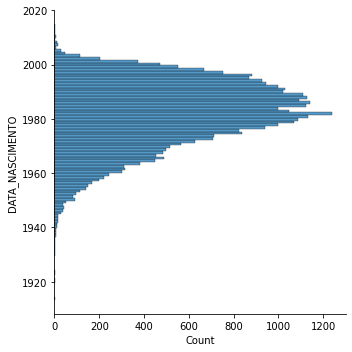

In [ ]:
import seaborn as sns

_ = sns.displot(data = clientes, y = "DATA_NASCIMENTO")

In [ ]:
clientes["IDADE_CAT"], bins = pd.qcut(clientes.DATA_NASCIMENTO, q = 5,
                                labels = ["Muito velho", "Velho", "Adulto", "Adulto Novo", "Jovem"],
                                retbins = True)
bins

DatetimeIndex([          '1913-04-05 00:00:00',
                         '1971-09-05 00:00:00',
                         '1979-10-11 00:00:00',
                         '1986-01-30 00:00:00',
               '1992-08-14 14:24:00.000000128',
                         '2014-12-20 00:00:00'],
              dtype='datetime64[ns]', freq=None)

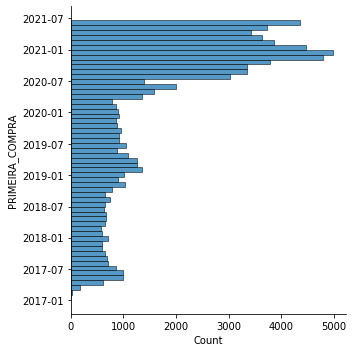

In [ ]:
import seaborn as sns

_ = sns.displot(data = clientes, y = "PRIMEIRA_COMPRA")

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88424 entries, 0 to 88423
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SEXO             88424 non-null  category      
 1   DATA_NASCIMENTO  34333 non-null  datetime64[ns]
 2   PRIMEIRA_COMPRA  85161 non-null  datetime64[ns]
 3   IDADE_CAT        34333 non-null  category      
dtypes: category(2), datetime64[ns](2)
memory usage: 4.7 MB


## Produtos

* **ID_PRODUTO:** Identificador único do produto
* **UNIDADE:** Unidade de medida do produto
* **NIVEL 1:** Categoria nível 1, mais agrupada
* **NIVEL 2:** Categoria nível 2
* **NIVEL 3:** Categoria nível 3
* **NIVEL 4:** Categoria nível 4, menos agrupada

### arrumando
por enquanto, acho q ta ok aqui

In [ ]:
import pandas as pd

prod = pd.read_csv("/content/produto.csv", index_col = "ID_PRODUTO")
prod = prod[prod["NIVEL 1"] != "                              "]

for column in prod.columns:
    prod[column] = prod[column].apply(lambda row: row.strip()).astype("category")

prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24098 entries, 6 to 36309
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   UNIDADE  24098 non-null  category
 1   NIVEL 1  24098 non-null  category
 2   NIVEL 2  24098 non-null  category
 3   NIVEL 3  24098 non-null  category
 4   NIVEL 4  24098 non-null  category
dtypes: category(5)
memory usage: 311.7 KB


In [ ]:
prod.head(10)

,UNIDADE,NIVEL 1,NIVEL 2,NIVEL 3,NIVEL 4
ID_PRODUTO,,,,,
6,UN,CAES,ACESSORIOS,CAMINHAS E CASINHAS,CAMINHAS
10,UN,CAES,HIGIENE E BELEZA,UTENSILIOS PARA BANHO,SHAMPOOS E COSMETICOS
11,UN,CAES,HIGIENE E BELEZA,UTENSILIOS PARA BANHO,SHAMPOOS E COSMETICOS
12,UN,CAES,HIGIENE E BELEZA,UTENSILIOS PARA BANHO,SHAMPOOS E COSMETICOS
13,UN,CAES,HIGIENE E BELEZA,UTENSILIOS PARA BANHO,SHAMPOOS E COSMETICOS
14,UN,CAES,HIGIENE E BELEZA,UTENSILIOS PARA BANHO,SHAMPOOS E COSMETICOS
15,UN,CAES,HIGIENE E BELEZA,UTENSILIOS PARA BANHO,SHAMPOOS E COSMETICOS
16,UN,CAES,HIGIENE E BELEZA,UTENSILIOS PARA BANHO,BANHO A SECO E TALCOS
17,UN,CAES,HIGIENE E BELEZA,UTENSILIOS PARA BANHO,SHAMPOOS E COSMETICOS


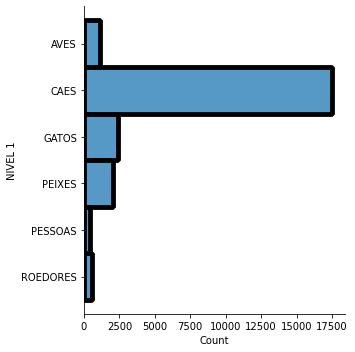

In [ ]:
import seaborn as sns

_ = sns.displot(data = prod, y = "NIVEL 1")

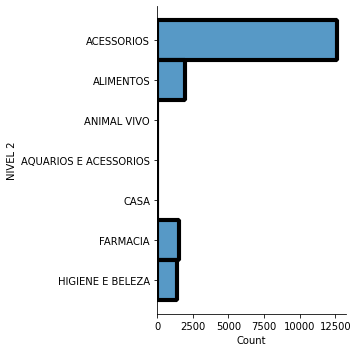

In [ ]:
_ = sns.displot(prod[prod["NIVEL 1"] == "CAES"], y = "NIVEL 2")

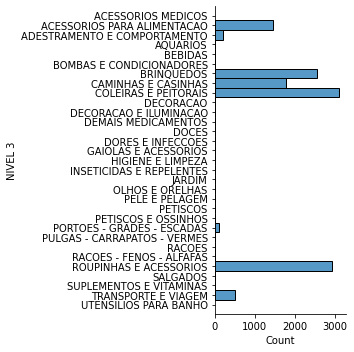

In [ ]:
_ = sns.displot(prod[(prod["NIVEL 1"] == "CAES") &
                     (prod["NIVEL 2"] == "ACESSORIOS")], y = "NIVEL 3")

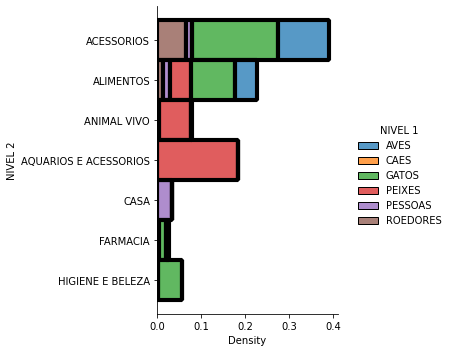

In [ ]:
# casa pra pessoas?
_ = sns.displot(prod[prod["NIVEL 1"] != "CAES"], y = "NIVEL 2",
                hue = "NIVEL 1", multiple = "stack", stat = "density")

## Vendas
* **ID_VENDA:** Identificador único da venda
* **DATA_VENDA:** Data da venda
* **ID_CLIENTE:** Identificador único do cliente
* **ID_PRODUTO:** Identificador único do produto
* **QUANTIDADE:** Quantidade vendida
* **CATEGORIA_VENDA:** Categoria da venda (físico ou e-commerce)

### Arrumando

1.   Deletei esses 2 clientes pq tavam comprando demais 25323.0, 52216.0
2.   Categoria dia da semana
3.   Datas de venda parecem tudo ok
4.   Quantidades vendidas parecem tudo ok



In [ ]:
vendas = pd.read_csv("/content/venda.csv", index_col = "ID_VENDA",
                     parse_dates = ["DATA_VENDA"])

vendas = vendas[vendas.ID_PRODUTO.notna()]
vendas.ID_PRODUTO = vendas.ID_PRODUTO.astype("int64")
vendas.info()

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339443 entries, 0 to 582462
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   DATA_VENDA       1339443 non-null  datetime64[ns]
 1   ID_CLIENTE       537803 non-null   float64       
 2   ID_PRODUTO       1339443 non-null  int64         
 3   QUANTIDADE       1339443 non-null  int64         
 4   CATEGORIA_VENDA  1339443 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 61.3+ MB


In [ ]:
vendas["CATEGORIA_VENDA"].value_counts()

FÍSICO                  1328513
E-COMMERCE                10930
Name: CATEGORIA_VENDA, dtype: int64

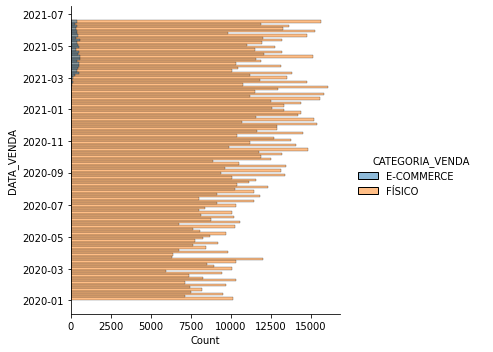

In [ ]:
# vendas online começaram proximo de 2021-03
import seaborn as sns

_ = sns.displot(vendas, y = "DATA_VENDA", hue = "CATEGORIA_VENDA")

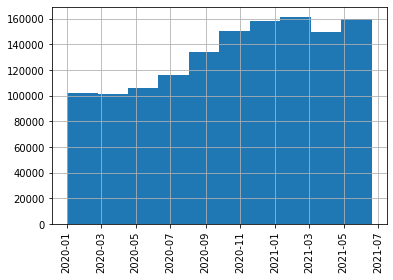

In [ ]:
vendas.DATA_VENDA.hist(xrot = 90)

In [ ]:
# essa 2 pessoas tão comprando demais
vendas.ID_CLIENTE.value_counts(sort = True, ascending = False).head(10)

25323.0    1701
52216.0     825
29057.0     397
29056.0     356
22874.0     292
60916.0     263
24716.0     257
57998.0     242
54509.0     232
43219.0     230
Name: ID_CLIENTE, dtype: int64

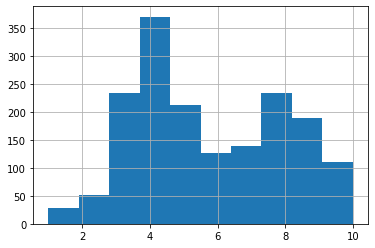

In [ ]:
_ = vendas[vendas['ID_CLIENTE'] == 25323.0]["DATA_VENDA"].dt.month.hist()

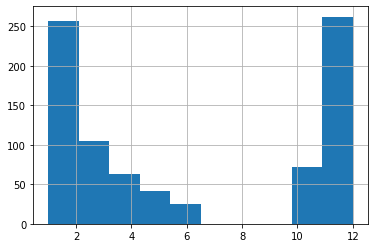

In [ ]:
# por algum motivo, as duas compras fora do normal parecem se complementar
_ = vendas[vendas['ID_CLIENTE'] == 52216.0]["DATA_VENDA"].dt.month.hist()

In [ ]:
vendas[vendas['ID_CLIENTE'] == 25323.0]["QUANTIDADE"].value_counts()

1     1350
2      164
3       64
5       32
4       32
10      19
6       12
8        9
7        5
12       4
16       2
23       2
15       1
14       1
28       1
20       1
24       1
30       1
Name: QUANTIDADE, dtype: int64

In [ ]:
vendas[vendas['ID_CLIENTE'] == 52216.0]["QUANTIDADE"].value_counts()

1     685
2      73
3      29
4      14
10      7
6       7
5       6
20      1
11      1
8       1
7       1
Name: QUANTIDADE, dtype: int64

In [ ]:
# tirei os 2 clientes q estavam anormais
vendas = vendas[~vendas['ID_CLIENTE'].isin([25323.0, 52216.0])]

In [ ]:
vendas["weekday"] = vendas["DATA_VENDA"].dt.day_name().astype("category")

vendas["weekday"] = vendas["weekday"].cat.set_categories(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    ordered = True)

In [ ]:
vendas.sort_values(by = "QUANTIDADE").tail(20)

,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,weekday
ID_VENDA,,,,,,
364071,2021-03-30,67426.0,3083,60,FÍSICO,Tuesday
359657,2020-05-28,36954.0,7312,60,FÍSICO,Thursday
413075,2021-02-28,16680.0,15963,60,FÍSICO,Sunday
288104,2020-03-01,NaN,14689,60,FÍSICO,Sunday
10188,2020-05-19,31071.0,31953,60,FÍSICO,Tuesday
258678,2020-07-03,NaN,1184,60,FÍSICO,Friday
449518,2021-06-12,76354.0,14588,60,FÍSICO,Saturday
370701,2020-04-13,NaN,1961,64,FÍSICO,Monday
138134,2020-12-23,NaN,31657,65,FÍSICO,Wednesday


In [ ]:
prod.loc[1529]

UNIDADE                              UN
NIVEL 1                           GATOS
NIVEL 2                       ALIMENTOS
NIVEL 3                          RACOES
NIVEL 4    RACAO UMIDA (SACHES E LATAS)
Name: 1529, dtype: object

# Explorando os dados

## Clientes
**resumo:**

1.   Grande **aumento no numero** de clientes com cadastro a partir de Julho de 2020 (principalmente data de nascimento)
2.   Faixa de idade dos clientes entre nascidos em **1970 e 1995**
3.   entre os cadastrados, maioria é **mulher**
4.   dentre os que preencheram a data de nascimento, os **jovems** foram o grupo com maior numero de entradas vazias para o campo SEXO

**propostas:**

1.   Programas de **fidelidade** / promoções para caDAStrados, alem de ser um chamativo, são uma boa maneira de se conseguir que os **clientes preencham** corretamente as informações 





In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88424 entries, 0 to 88423
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SEXO             88424 non-null  category      
 1   DATA_NASCIMENTO  34333 non-null  datetime64[ns]
 2   PRIMEIRA_COMPRA  85161 non-null  datetime64[ns]
 3   IDADE_CAT        34333 non-null  category      
dtypes: category(2), datetime64[ns](2)
memory usage: 4.7 MB


In [ ]:
clientes.head()

,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,IDADE_CAT
ID_CLIENTE,,,,
0,vazio,NaT,NaT,NaN
1,feminino,1983-02-25,NaT,Adulto
2,feminino,1986-11-01,NaT,Adulto Novo
3,feminino,1984-09-13,2021-06-20,Adulto
4,vazio,NaT,2021-06-20,NaN


In [ ]:
# depois de 2020-07 teve um grande aumento de cadastros (começo das vendas online)
clientes.groupby(pd.Grouper(key = "PRIMEIRA_COMPRA", freq = "M")).count()

,SEXO,DATA_NASCIMENTO,IDADE_CAT
PRIMEIRA_COMPRA,,,
2017-01-31,4,0,0
2017-02-28,23,0,0
2017-03-31,199,2,2
2017-04-30,728,18,18
2017-05-31,1106,21,21
2017-06-30,967,24,24
2017-07-31,912,13,13
2017-08-31,726,11,11
2017-09-30,713,11,11


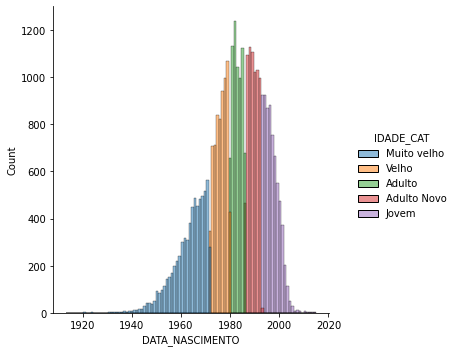

In [ ]:
# maiores faixas etarias para pessoas nascidas entre 1970 e 1990
_ = sns.displot(clientes, x = "DATA_NASCIMENTO", hue = "IDADE_CAT")

In [ ]:
# pessoas mais velhas tem uma tendencia maior a preencher formulario?
clientes.groupby("IDADE_CAT")["SEXO"].value_counts(True)

IDADE_CAT    SEXO     
Muito velho  feminino     0.554455
             masculino    0.405358
             vazio        0.040186
Velho        feminino     0.573114
             masculino    0.373871
             vazio        0.053015
Adulto       feminino     0.552758
             masculino    0.398050
             vazio        0.049192
Adulto Novo  feminino     0.542778
             masculino    0.390322
             vazio        0.066900
Jovem        feminino     0.584098
             masculino    0.342945
             vazio        0.072958
Name: SEXO, dtype: float64

In [ ]:
# apersar de que uma grande parcela dos clientes não ter preenchido o campo SEXO,
# a maior parte do publico conhecido são mulheres
clientes.groupby("SEXO")["DATA_NASCIMENTO"].count()

SEXO
feminino     19276
masculino    13119
vazio         1938
Name: DATA_NASCIMENTO, dtype: int64

In [ ]:
clientes["SEXO"].value_counts()

vazio        53668
feminino     20843
masculino    13913
Name: SEXO, dtype: int64

## Produtos
**resumo:**

1.   **PEIXES, AVES, ROEDORES E PESSOAS** com bastante entradas vazias para o nivel 4
2.    Grande foco no mercado de acessorios cerca de (**60% dos itens cadastrados**), principlamente para **CAES** (mais de **12 mil itens** cadastrados)
3.   Tipos de produtos com maior variedade (**CAES**)
          PARA MORDER E PUXAR              1210
          COMEDOUROS E BEBEDOUROS          1211
          PEITORAIS                        1349
          CAMINHAS                         1370
          MODA VERAO                       1573
4.    Algum destaque para o mercado de **GATOS e PEIXES (acessorios)**

**proposta:**

1.   Vou verificar a quatidade de vendas de acessorios e de vendas dos animais alem dos CAES, mas acho que precisamos fazer um  devido balanço das saidas dos produtos
2.   Utilizar o codigo de barras dos produtos como ID pode evitar o cadastro duplicado de itens
3.   Adicionar datas como data de cadastro / ultimo pedido do item pode ajudar a identificar itens que sairam de linha




In [ ]:
prod.head()

,UNIDADE,NIVEL 1,NIVEL 2,NIVEL 3,NIVEL 4
ID_PRODUTO,,,,,
6,UN,CAES,ACESSORIOS,CAMINHAS E CASINHAS,CAMINHAS
10,UN,CAES,HIGIENE E BELEZA,UTENSILIOS PARA BANHO,SHAMPOOS E COSMETICOS
11,UN,CAES,HIGIENE E BELEZA,UTENSILIOS PARA BANHO,SHAMPOOS E COSMETICOS
12,UN,CAES,HIGIENE E BELEZA,UTENSILIOS PARA BANHO,SHAMPOOS E COSMETICOS
13,UN,CAES,HIGIENE E BELEZA,UTENSILIOS PARA BANHO,SHAMPOOS E COSMETICOS


In [ ]:
print(prod[prod["NIVEL 2"].str.contains("FARMACIA")]["NIVEL 3"].unique())

['PULGAS - CARRAPATOS - VERMES', 'PELE E PELAGEM', 'DORES E INFECCOES', 'VITAMINAS E SUPLEMENTOS', 'OLHOS E ORELHAS', 'ACESSORIOS MEDICOS', 'SUPLEMENTOS E VITAMINAS', 'DEMAIS MEDICAMENTOS']
Categories (8, object): ['PULGAS - CARRAPATOS - VERMES', 'PELE E PELAGEM', 'DORES E INFECCOES',
                         'VITAMINAS E SUPLEMENTOS', 'OLHOS E ORELHAS', 'ACESSORIOS MEDICOS',
                         'SUPLEMENTOS E VITAMINAS', 'DEMAIS MEDICAMENTOS']


In [ ]:
print(prod[prod["NIVEL 1"].str.contains("PESSOAS")]["NIVEL 2"].unique())
prod[prod["NIVEL 1"].str.contains("PESSOAS")]["NIVEL 3"].unique()


['ACESSORIOS', 'CASA', 'ALIMENTOS']
Categories (3, object): ['ACESSORIOS', 'CASA', 'ALIMENTOS']


['', 'JARDIM', 'DOCES', 'INSETICIDAS E REPELENTES', 'DECORACAO', 'SALGADOS', 'BEBIDAS']
Categories (7, object): ['', 'JARDIM', 'DOCES', 'INSETICIDAS E REPELENTES', 'DECORACAO',
                         'SALGADOS', 'BEBIDAS']

In [ ]:
# algumas entradas em branco
# produtos com maior variedade são acessorios (caes principalmente)
prod.groupby(["NIVEL 1", "NIVEL 4"], as_index = True)["UNIDADE"].count().sort_values().tail(20)

NIVEL 1   NIVEL 4                      
CAES      OSSINHOS E PALITOS                321
          MODA INVERNO                      329
GATOS     RACAO SECA                        363
CAES      VITAMINAS E SUPLEMENTOS           381
          BISCOITOS - BIFINHOS - SNACKS     387
PESSOAS                                     410
CAES      SHAMPOOS E COSMETICOS             506
ROEDORES                                    574
CAES      ACESSORIOS FASHION                723
          COLEIRAS                          796
          RACAO SECA                        900
          PELUCIA - VINIL - LATEX           908
          GUIAS                             958
AVES                                       1152
CAES      PARA MORDER E PUXAR              1210
          COMEDOUROS E BEBEDOUROS          1211
          PEITORAIS                        1349
          CAMINHAS                         1370
          MODA VERAO                       1573
PEIXES                                     2032


In [ ]:
!pip install -q plotly==4.5.2

import plotly.express as px

sun_df = prod.groupby(["NIVEL 1", "NIVEL 2"], as_index = False)["NIVEL 3"].count()

px.sunburst(sun_df, path = ["NIVEL 1", "NIVEL 2"] + ["NIVEL 3"],
            title = "Tipos diferentes de Produtos por area",
            hover_data = ["NIVEL 1", "NIVEL 2"]
            )

# mercado principal são os donos de cachorros,
# gatos e peixes em segundo lugar
# tem-se uma grande variedade de produtos na area de acessorios

     |████████████████████████████████| 7.1 MB 4.2 MB/s 


## Vendas
**resumo:**


1.   Percebe-se um perfil um pouco diferente entre os 
> **compradores online:** mais compras nos dias de semana e um destaque maior para produtos para gatos
>
> **compradores fisico:** vendas altas aos sabados (20% do total) 
>
> **Geral:** Vendas fracas aos domingos
2.   vendas em pequenas quantidades (<=5) representam cerca de 88% do total de vendas e 63% do volume de vendas
3.   Setores com maior volume de vendas:
```
    RACOES                            676084
    HIGIENE E LIMPEZA                 192297
    PETISCOS E OSSINHOS               174073
    BRINQUEDOS                        106844
```
4.   Tipo de produtos mais procurados:
> **Tapetes Higienicos** CAES e **Areia** GATO 
5.   Tipo de produtos mais vendidos (*ID_PRODUTO*):
> **RACAO UMIDA (SACHES E LATAS)** CAES (*16950*) E GATO (*14588, 13744*)
>
> **Tapetes Higienicos** CAES (*17804*) e **Areia** GATO (*26809, 31962*)

**Propostas:**


1.   Promoções aos Domingos (no setor de banho e tosa, por exemplo) poderiam aumentar as vendas aos Domingos
2.   Promoções para compras em quantidade (leve 3 pague 2) poderiam incentivar compras maiores
3.   Investir sempre em ter uma seção com boa qualidade e bastante diversificada de **alimentos** (principalmente umida) e produtos de higiene, ja que são os produtos mais buscados e vendidos
4.   Aumentar a oferta de produtos para gatos
5.   Alinhar a disponibilidade e variedade de produtos com a quantidade de vendas







In [ ]:
prod.loc[[14588, 16950, 26809, 31962, 17804, 13744]]

,UNIDADE,NIVEL 1,NIVEL 2,NIVEL 3,NIVEL 4
ID_PRODUTO,,,,,
14588,UN,GATOS,ALIMENTOS,RACOES,RACAO UMIDA (SACHES E LATAS)
16950,UN,CAES,ALIMENTOS,RACOES,RACAO UMIDA (SACHES E LATAS)
26809,UN,GATOS,HIGIENE E BELEZA,HIGIENE E LIMPEZA,AREIAS E GRANULADOS
31962,UN,GATOS,HIGIENE E BELEZA,HIGIENE E LIMPEZA,AREIAS E GRANULADOS
17804,UN,CAES,HIGIENE E BELEZA,HIGIENE E LIMPEZA,TAPETES HIGIENICOS
13744,UN,GATOS,ALIMENTOS,RACOES,RACAO UMIDA (SACHES E LATAS)


### Geral

In [ ]:
vendas.head()

,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,weekday
ID_VENDA,,,,,,
0,2021-02-10,46618.0,6669,1,E-COMMERCE,Wednesday
0,2021-02-10,46618.0,7394,1,E-COMMERCE,Wednesday
1,2021-02-12,70969.0,20460,1,E-COMMERCE,Friday
2,2021-02-12,43436.0,7478,1,E-COMMERCE,Friday
2,2021-02-12,43436.0,3198,1,E-COMMERCE,Friday


In [ ]:
vendas.groupby("ID_PRODUTO").agg({"QUANTIDADE": "sum"}).sort_values(by = "QUANTIDADE",
                                                                    ascending = False)

,QUANTIDADE
ID_PRODUTO,
14588,14588
16950,9861
26809,7770
31962,7026
13744,6878
...,...
25651,1
25648,1
25646,1


In [ ]:
vendas[vendas["ID_PRODUTO"] == 14588].sort_values(by = "QUANTIDADE", ascending = False)

,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,weekday
ID_VENDA,,,,,,
363365,2021-02-11,34540.0,14588,60,FÍSICO,Thursday
364807,2021-05-05,34540.0,14588,60,FÍSICO,Wednesday
449518,2021-06-12,76354.0,14588,60,FÍSICO,Saturday
554038,2020-12-04,30594.0,14588,59,FÍSICO,Friday
416203,2020-09-02,NaN,14588,58,FÍSICO,Wednesday
...,...,...,...,...,...,...
381274,2020-01-09,NaN,14588,1,FÍSICO,Thursday
380771,2020-01-04,NaN,14588,1,FÍSICO,Saturday
380739,2020-01-04,NaN,14588,1,FÍSICO,Saturday


In [ ]:
prod.loc[14588]

UNIDADE                              UN
NIVEL 1                           GATOS
NIVEL 2                       ALIMENTOS
NIVEL 3                          RACOES
NIVEL 4    RACAO UMIDA (SACHES E LATAS)
Name: 14588, dtype: object

In [ ]:
# existem mais de 10 000 items provavelmente com vendas muito ruins
# tambem pode ser algum problema de cadastros repetidos ou items que sairam de linha
n_vendas = vendas["ID_PRODUTO"].value_counts(ascending = False)
n_vendas[n_vendas < 10]

901      9
18470    9
2170     9
29368    9
32087    9
        ..
6539     1
17792    1
25391    1
20867    1
10043    1
Name: ID_PRODUTO, Length: 10018, dtype: int64

In [ ]:
vendas.groupby(["DATA_VENDA", "ID_CLIENTE"])["QUANTIDADE"].sum()

DATA_VENDA  ID_CLIENTE
2020-01-02  6240.0        1
            10987.0       1
            12226.0       1
            13268.0       4
            19672.0       1
                         ..
2021-06-19  88399.0       3
            88400.0       3
            88402.0       1
            88403.0       1
            88408.0       2
Name: QUANTIDADE, Length: 217619, dtype: int64

Vendas abaixo de 5 quantidades:  0.8773740729259683
Volume de vendas:  0.6345640287222166


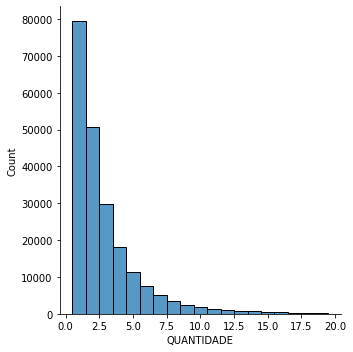

In [ ]:
# vendas com 5 ou menos quantidades representam quase todas as vendas
qvendas = vendas.groupby(["DATA_VENDA", "ID_CLIENTE"])["QUANTIDADE"].sum()
_ = sns.displot(qvendas[qvendas < 20].astype("category").cat.as_ordered())
print("Vendas abaixo de 5 quantidades: ", qvendas[qvendas <= 5].count() / qvendas[qvendas < 20].count())
print("Volume de vendas: ", qvendas[qvendas <= 5].sum() / qvendas[qvendas < 20].sum())


### Online

In [ ]:
vendas_online = vendas[vendas["CATEGORIA_VENDA"].str.contains("E-COMMERCE", na=False)]
vendas_online.head()

,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,weekday
ID_VENDA,,,,,,
0,2021-02-10,46618.0,6669,1,E-COMMERCE,Wednesday
0,2021-02-10,46618.0,7394,1,E-COMMERCE,Wednesday
1,2021-02-12,70969.0,20460,1,E-COMMERCE,Friday
2,2021-02-12,43436.0,7478,1,E-COMMERCE,Friday
2,2021-02-12,43436.0,3198,1,E-COMMERCE,Friday


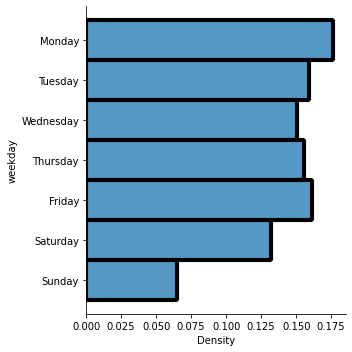

In [ ]:
# vendas online nos domingos são extremamente baixas 
# vendas online bem distribuidas ao longo da semana
import seaborn as sns

_ = sns.displot(vendas_online, y = "weekday", stat = "density")

In [ ]:
# produtos mais vendidos em NUMERO DE COMPRAS
# ja se observa um destaque maior para o segmento de gatos
# sendo os produtos mais vendidos Tapetes e areias de gato

n_vendas = vendas_online["ID_PRODUTO"].value_counts(ascending = False)
topvendas = n_vendas.head(20)

for index, top in zip(topvendas.index, topvendas):
    # alguns produtos estão sem descrição nivel 4
    prod_name = prod.loc[index]["NIVEL 4"]
    if not prod_name:
        prod_name = prod.loc[index]["NIVEL 3"] 

    print("Número de Vendas: {:<5}  |  Segmento: {:<8}  |  Produto: {:<30}|   Index: {}".format(
        top,
        prod.loc[index]["NIVEL 1"],
        prod_name,
        index))

Número de Vendas: 85     |  Segmento: CAES      |  Produto: ANTIPULGAS E CARRAPATOS       |   Index: 2768
Número de Vendas: 74     |  Segmento: CAES      |  Produto: TAPETES HIGIENICOS            |   Index: 27055
Número de Vendas: 64     |  Segmento: GATOS     |  Produto: AREIAS E GRANULADOS           |   Index: 7628
Número de Vendas: 63     |  Segmento: CAES      |  Produto: TAPETES HIGIENICOS            |   Index: 9505
Número de Vendas: 61     |  Segmento: CAES      |  Produto: TAPETES HIGIENICOS            |   Index: 17804
Número de Vendas: 55     |  Segmento: GATOS     |  Produto: AREIAS E GRANULADOS           |   Index: 3792
Número de Vendas: 54     |  Segmento: GATOS     |  Produto: AREIAS E GRANULADOS           |   Index: 7689
Número de Vendas: 53     |  Segmento: CAES      |  Produto: TAPETES HIGIENICOS            |   Index: 2178
Número de Vendas: 48     |  Segmento: GATOS     |  Produto: AREIAS E GRANULADOS           |   Index: 32290
Número de Vendas: 42     |  Segmento: CAES 

In [ ]:
# produtos mais vendidos em QUANTIDADE
# maior para o segmento de gatos
# sendo os produtos mais vendidos RACAO UMIDA

q_vendas = vendas_online.groupby(["ID_PRODUTO"]).agg(
    {"QUANTIDADE": "sum"}).sort_values(by = "QUANTIDADE", ascending = False)

topvendas = q_vendas["QUANTIDADE"].head(20)

for index, top in zip(topvendas.index, topvendas):
    # alguns produtos estão sem descrição nivel 4
    prod_name = prod.loc[index]["NIVEL 4"]
    if not prod_name:
        prod_name = prod.loc[index]["NIVEL 3"] 

    print("Quantidade vendida: {:<5}  |  Segmento: {:<8}  |  Produto: {:<30}|   Index: {}".format(
        top,
        prod.loc[index]["NIVEL 1"],
        prod_name,
        index))

Quantidade vendida: 162    |  Segmento: GATOS     |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 14588
Quantidade vendida: 142    |  Segmento: GATOS     |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 28698
Quantidade vendida: 134    |  Segmento: GATOS     |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 13744
Quantidade vendida: 124    |  Segmento: GATOS     |  Produto: AREIAS E GRANULADOS           |   Index: 3792
Quantidade vendida: 105    |  Segmento: CAES      |  Produto: TAPETES HIGIENICOS            |   Index: 27055
Quantidade vendida: 102    |  Segmento: GATOS     |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 31657
Quantidade vendida: 102    |  Segmento: GATOS     |  Produto: AREIAS E GRANULADOS           |   Index: 7628
Quantidade vendida: 94     |  Segmento: GATOS     |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 12032
Quantidade vendida: 86     |  Segmento: CAES      |  Produto: ANTIPULGAS E CARRAPATOS       |   Index: 2768
Quantidade vendida: 77

In [ ]:
# produtos mais vendidos em QUANTIDADE
# maior para o segmento de gatos
# sendo os produtos mais vendidos RACAO UMIDA

q_vendas = vendas_online.groupby(["ID_PRODUTO"]).agg(
    {"QUANTIDADE": "sum"}).sort_values(by = "QUANTIDADE", ascending = False)

topvendas = q_vendas["QUANTIDADE"].head(20)

for index, top in zip(topvendas.index, topvendas):
    # alguns produtos estão sem descrição nivel 4
    prod_name = prod.loc[index]["NIVEL 4"]
    if not prod_name:
        prod_name = prod.loc[index]["NIVEL 3"] 

    print("Quantidade vendida: {:<5}  |  Segmento: {:<8}  |  Produto: {:<30}|   Index: {}".format(
        top,
        prod.loc[index]["NIVEL 1"],
        prod_name,
        index))

Quantidade vendida: 162    |  Segmento: GATOS     |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 14588
Quantidade vendida: 142    |  Segmento: GATOS     |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 28698
Quantidade vendida: 134    |  Segmento: GATOS     |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 13744
Quantidade vendida: 124    |  Segmento: GATOS     |  Produto: AREIAS E GRANULADOS           |   Index: 3792
Quantidade vendida: 105    |  Segmento: CAES      |  Produto: TAPETES HIGIENICOS            |   Index: 27055
Quantidade vendida: 102    |  Segmento: GATOS     |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 31657
Quantidade vendida: 102    |  Segmento: GATOS     |  Produto: AREIAS E GRANULADOS           |   Index: 7628
Quantidade vendida: 94     |  Segmento: GATOS     |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 12032
Quantidade vendida: 86     |  Segmento: CAES      |  Produto: ANTIPULGAS E CARRAPATOS       |   Index: 2768
Quantidade vendida: 77

### Físico

In [ ]:
vendas_offline = vendas[~vendas["CATEGORIA_VENDA"].str.contains("E-COMMERCE", na=False)]
vendas_offline.head()

,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,weekday
ID_VENDA,,,,,,
16,2020-09-08,46618.0,27604,1,FÍSICO,Tuesday
18,2020-09-08,46618.0,2733,1,FÍSICO,Tuesday
20,2020-09-08,46631.0,3207,1,FÍSICO,Tuesday
20,2020-09-08,46631.0,2017,2,FÍSICO,Tuesday
22,2020-09-09,39662.0,20592,1,FÍSICO,Wednesday


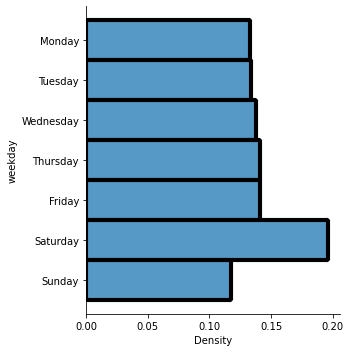

In [ ]:
# dia com mais vendas: sabado (20%)
# dia com menos vendas: domingo (12%)
import seaborn as sns

_ = sns.displot(vendas_offline, y = "weekday", stat = "density")

In [ ]:
# produtos mais vendidos em NUMERO DE COMPRAS
# mais vendas no setor de cachorros
# produtos mais vendidos: tapetes higienicos e snacks
n_vendas = vendas_offline["ID_PRODUTO"].value_counts(ascending = False)
topvendas = n_vendas.head(20)

for index, top in zip(topvendas.index, topvendas):
    # alguns produtos estão sem descrição nivel 4
    prod_name = prod.loc[index]["NIVEL 4"]
    if not prod_name:
        prod_name = prod.loc[index]["NIVEL 3"] 

    print("Número de Vendas: {:<5}  |  Segmento: {:<8}  |  Produto: {:<30}|   Index: {}".format(
        top,
        prod.loc[index]["NIVEL 1"],
        prod_name,
        index))

Número de Vendas: 5752   |  Segmento: CAES      |  Produto: TAPETES HIGIENICOS            |   Index: 17804
Número de Vendas: 5261   |  Segmento: CAES      |  Produto: TAPETES HIGIENICOS            |   Index: 8098
Número de Vendas: 5013   |  Segmento: CAES      |  Produto: TAPETES HIGIENICOS            |   Index: 2177
Número de Vendas: 4811   |  Segmento: CAES      |  Produto: BISCOITOS - BIFINHOS - SNACKS |   Index: 25612
Número de Vendas: 4459   |  Segmento: CAES      |  Produto: VITAMINAS E SUPLEMENTOS       |   Index: 2629
Número de Vendas: 4352   |  Segmento: CAES      |  Produto: ANTIPULGAS E CARRAPATOS       |   Index: 2768
Número de Vendas: 4086   |  Segmento: CAES      |  Produto: BISCOITOS - BIFINHOS - SNACKS |   Index: 26104
Número de Vendas: 3941   |  Segmento: CAES      |  Produto: BISCOITOS - BIFINHOS - SNACKS |   Index: 5414
Número de Vendas: 3842   |  Segmento: CAES      |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 16950
Número de Vendas: 3703   |  Segmento: CAES

In [ ]:
# produtos mais vendidos em QUANTIDADE DE COMPRAS
# ja se observa um destaque maior para o segmento de gatos
# sendo os produtos mais vendidos RACAO UMIDA (gato e cachorro)

q_vendas = vendas_offline.groupby(["ID_PRODUTO"]).agg(
    {"QUANTIDADE": "sum"}).sort_values(by = "QUANTIDADE", ascending = False)

topvendas = q_vendas["QUANTIDADE"].head(20)

for index, top in zip(topvendas.index, topvendas):
    # alguns produtos estão sem descrição nivel 4
    prod_name = prod.loc[index]["NIVEL 4"]
    if not prod_name:
        prod_name = prod.loc[index]["NIVEL 3"] 

    print("Quantidade Comprada: {:<5}  |  Segmento: {:<8}  |  Produto: {:<30}|   Index: {}".format(
        top,
        prod.loc[index]["NIVEL 1"],
        prod_name,
        index))

Quantidade Comprada: 14426  |  Segmento: GATOS     |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 14588
Quantidade Comprada: 9827   |  Segmento: CAES      |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 16950
Quantidade Comprada: 7765   |  Segmento: GATOS     |  Produto: AREIAS E GRANULADOS           |   Index: 26809
Quantidade Comprada: 7026   |  Segmento: GATOS     |  Produto: AREIAS E GRANULADOS           |   Index: 31962
Quantidade Comprada: 6744   |  Segmento: GATOS     |  Produto: RACAO UMIDA (SACHES E LATAS)  |   Index: 13744
Quantidade Comprada: 6332   |  Segmento: CAES      |  Produto: TAPETES HIGIENICOS            |   Index: 17804
Quantidade Comprada: 5618   |  Segmento: CAES      |  Produto: TAPETES HIGIENICOS            |   Index: 8098
Quantidade Comprada: 5551   |  Segmento: CAES      |  Produto: TAPETES HIGIENICOS            |   Index: 2177
Quantidade Comprada: 5183   |  Segmento: CAES      |  Produto: BISCOITOS - BIFINHOS - SNACKS |   Index: 25612
Quantidade C

## Merge Vendas <-- Produtos

**resumo:** 

1. **TIPO:**
> **FISICO:** CAES são 65% da vendas e GATOS 23%
> 
> **ONLINE:** CAES são 60% das vendas e GATOS 35% 

2.   **Alimentos** 
> representam cerca de **55-60%** do volume de vendas
>
> representam cerca de **50%** da quantidade de vendas
1.   **Acessorios** 
> tem pouco volume de **vendas online (7%) e fisico (16%)**
> 
> tem pouco quantidade de **vendas online (9%) e fisico (19%)**
>
> **roupas moda inverno e moda verão** representam 7 % do volume de vendas de acessorios, caminhas 6% e **peitorais 18%**

**propostas:**


1.   Alinhar disponibilidade e variedade de produtos com o volume de vendas
2.   uma parte significativa das vendas online são no setor de **GATOS**, aumentar a oferta de produtos nesse segmento



In [ ]:
new_vendas = vendas.merge(prod, how = "left", on = "ID_PRODUTO")
new_vendas.head()

,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,weekday,UNIDADE,NIVEL 1,NIVEL 2,NIVEL 3,NIVEL 4
0,2021-02-10,46618.0,6669,1,E-COMMERCE,Wednesday,UN,CAES,ALIMENTOS,PETISCOS E OSSINHOS,BISCOITOS - BIFINHOS - SNACKS
1,2021-02-10,46618.0,7394,1,E-COMMERCE,Wednesday,UN,CAES,ALIMENTOS,PETISCOS E OSSINHOS,BISCOITOS - BIFINHOS - SNACKS
2,2021-02-12,70969.0,20460,1,E-COMMERCE,Friday,UN,CAES,ACESSORIOS,CAMINHAS E CASINHAS,ALMOFADAS E COLCHONETES
3,2021-02-12,43436.0,7478,1,E-COMMERCE,Friday,UN,CAES,FARMACIA,VITAMINAS E SUPLEMENTOS,VITAMINAS E SUPLEMENTOS
4,2021-02-12,43436.0,3198,1,E-COMMERCE,Friday,UN,CAES,FARMACIA,DEMAIS MEDICAMENTOS,TRATAMENTO DIGESTIVO


In [ ]:
new_vendas[new_vendas["NIVEL 4"].str.contains("MODA", na = False)]["QUANTIDADE"].sum()

6658

In [ ]:
new_vendas["QUANTIDADE"].sum()

1668288

In [ ]:
moda = new_vendas[new_vendas["NIVEL 4"].str.contains("MODA", na = False)]["QUANTIDADE"].sum()
total = new_vendas[new_vendas["NIVEL 3"].str.contains("ACESSORIO", na = False)]["QUANTIDADE"].sum()

moda * 100 / total

7.258099681681419

In [ ]:
moda = new_vendas[new_vendas["NIVEL 4"].str.contains("CAMINHA", na = False)]["QUANTIDADE"].sum()
total = new_vendas[new_vendas["NIVEL 3"].str.contains("ACESSORIO", na = False)]["QUANTIDADE"].sum()

moda * 100 / total

6.388174246718703

In [ ]:
moda = new_vendas[new_vendas["NIVEL 4"].str.contains("PEITORAIS", na = False)]["QUANTIDADE"].sum()
total = new_vendas[new_vendas["NIVEL 3"].str.contains("ACESSORIO", na = False)]["QUANTIDADE"].sum()

moda * 100 / total

18.34910391139406

In [ ]:
# setor de gatos ganhando uma expressividade maior com vendas online
print("VENDAS ONLINES")
online = new_vendas[new_vendas["CATEGORIA_VENDA"].str.contains("E-COMMERCE", na=False)].groupby("NIVEL 1").agg({"QUANTIDADE": "sum"}).sort_values(by = "QUANTIDADE", ascending = False)
print(100 * online / online.sum())
print("\n")
print("VENDAS FISICO")
offline = new_vendas[~new_vendas["CATEGORIA_VENDA"].str.contains("E-COMMERCE", na=False)].groupby("NIVEL 1").agg({"QUANTIDADE": "sum"}).sort_values(by = "QUANTIDADE", ascending = False)
print(100 * offline / offline.sum())

VENDAS ONLINES
          QUANTIDADE
NIVEL 1             
CAES       60.044584
GATOS      35.057697
AVES        2.268555
ROEDORES    2.229216
PEIXES      0.399948
PESSOAS     0.000000


VENDAS FISICO
          QUANTIDADE
NIVEL 1             
CAES       65.968650
GATOS      23.103968
AVES        3.531663
ROEDORES    2.839335
PEIXES      2.826444
PESSOAS     1.729941


In [ ]:
# Volume de vendas
# destaque para a venda no setor de alimentos
print("VENDAS ONLINES")
online = new_vendas[new_vendas["CATEGORIA_VENDA"].str.contains("E-COMMERCE", na=False)].groupby("NIVEL 2").agg({"QUANTIDADE": "sum"}).sort_values(by = "QUANTIDADE", ascending = False)
print(100 * online / online.sum())
print("\n")
print("VENDAS FISICO")
offline = new_vendas[~new_vendas["CATEGORIA_VENDA"].str.contains("E-COMMERCE", na=False)].groupby("NIVEL 2").agg({"QUANTIDADE": "sum"}).sort_values(by = "QUANTIDADE", ascending = False)
print(100 * offline / offline.sum())

VENDAS ONLINES
                       QUANTIDADE
NIVEL 2                          
ALIMENTOS               58.975872
HIGIENE E BELEZA        17.361657
FARMACIA                16.430632
ACESSORIOS               7.100708
AQUARIOS E ACESSORIOS    0.131130
ANIMAL VIVO              0.000000
CASA                     0.000000


VENDAS FISICO
                       QUANTIDADE
NIVEL 2                          
ALIMENTOS               55.008041
ACESSORIOS              16.571009
HIGIENE E BELEZA        15.243186
FARMACIA                10.599890
AQUARIOS E ACESSORIOS    1.207926
ANIMAL VIVO              1.050323
CASA                     0.319624


In [ ]:
# Quantidade de Vendas
# destaque para a venda no setor de alimentos
print("VENDAS ONLINES")
online = new_vendas[new_vendas["CATEGORIA_VENDA"].str.contains("E-COMMERCE", na=False)].groupby("NIVEL 2").agg({"QUANTIDADE": "count"}).sort_values(by = "QUANTIDADE", ascending = False)
print(100 * online / online.sum())
print("\n")
print("VENDAS FISICO")
offline = new_vendas[~new_vendas["CATEGORIA_VENDA"].str.contains("E-COMMERCE", na=False)].groupby("NIVEL 2").agg({"QUANTIDADE": "count"}).sort_values(by = "QUANTIDADE", ascending = False)
print(100 * offline / offline.sum())

VENDAS ONLINES
                       QUANTIDADE
NIVEL 2                          
ALIMENTOS               51.437202
FARMACIA                20.285610
HIGIENE E BELEZA        18.949103
ACESSORIOS               9.163310
AQUARIOS E ACESSORIOS    0.164775
ANIMAL VIVO              0.000000
CASA                     0.000000


VENDAS FISICO
                       QUANTIDADE
NIVEL 2                          
ALIMENTOS               50.044859
ACESSORIOS              19.268007
HIGIENE E BELEZA        16.001551
FARMACIA                12.120046
AQUARIOS E ACESSORIOS    1.341549
ANIMAL VIVO              0.883525
CASA                     0.340462


In [ ]:
# Grande volume de vendas para rações
# vendas expressivas para produtos de higiene, petiscos e brinquedos
volume = new_vendas.groupby("NIVEL 3").agg({"QUANTIDADE": "sum"}).sort_values(by = "QUANTIDADE", ascending = False).head(20)
print(100 * volume / volume.sum())

                              QUANTIDADE
NIVEL 3                                 
RACOES                         42.048424
HIGIENE E LIMPEZA              11.959736
PETISCOS E OSSINHOS            10.826311
BRINQUEDOS                      6.645065
UTENSILIOS PARA BANHO           3.868907
PULGAS - CARRAPATOS - VERMES    3.660246
ACESSORIOS PARA ALIMENTACAO     3.052423
COLEIRAS E PEITORAIS            2.435956
VITAMINAS E SUPLEMENTOS         2.190476
DORES E INFECCOES               1.825148
RACOES - FENOS - ALFAFAS        1.739631
GAIOLAS E ACESSORIOS            1.440788
PELE E PELAGEM                  1.397750
DOCES                           1.381579
                                1.107428
PETISCOS                        1.050396
ADESTRAMENTO E COMPORTAMENTO    0.927127
ROUPINHAS E ACESSORIOS          0.889189
CAMINHAS E CASINHAS             0.780287
OLHOS E ORELHAS                 0.773135


In [ ]:
# setor de produtos com maior volume de venda Rações e produtos de higiene (CAES e GATOS)

print("VENDAS ONLINES")
print(new_vendas[new_vendas["CATEGORIA_VENDA"].str.contains("E-COMMERCE", na=False)].groupby(["NIVEL 1", "NIVEL 3"]).agg({"QUANTIDADE": "sum"}).sort_values(by = "QUANTIDADE", ascending = False).head(20))
print("\n")
print("VENDAS FISICO")
print(new_vendas[~new_vendas["CATEGORIA_VENDA"].str.contains("E-COMMERCE", na=False)].groupby(["NIVEL 1", "NIVEL 3"]).agg({"QUANTIDADE": "sum"}).sort_values(by = "QUANTIDADE", ascending = False).head(20))

VENDAS ONLINES
                                       QUANTIDADE
NIVEL 1  NIVEL 3                                 
CAES     RACOES                            3828.0
GATOS    RACOES                            3693.0
         HIGIENE E LIMPEZA                 1115.0
CAES     HIGIENE E LIMPEZA                  984.0
         PULGAS - CARRAPATOS - VERMES       778.0
         PETISCOS E OSSINHOS                759.0
         UTENSILIOS PARA BANHO              467.0
         DORES E INFECCOES                  431.0
         PELE E PELAGEM                     411.0
         VITAMINAS E SUPLEMENTOS            369.0
         BRINQUEDOS                         307.0
AVES     RACOES                             279.0
ROEDORES RACOES - FENOS - ALFAFAS           222.0
CAES     ACESSORIOS PARA ALIMENTACAO        191.0
GATOS    PETISCOS                           177.0
CAES     OLHOS E ORELHAS                    172.0
         DEMAIS MEDICAMENTOS                155.0
GATOS    PULGAS - CARRAPATOS - VERM

In [ ]:
!pip install -q plotly==4.5.2

import plotly.express as px

sun_df = new_vendas.groupby(["NIVEL 1", "NIVEL 2", "NIVEL 3"], as_index = False)["QUANTIDADE"].sum()

px.sunburst(sun_df, path = ["NIVEL 1", "NIVEL 2", "NIVEL 3"],
            values = "QUANTIDADE", color = "QUANTIDADE",
            color_continuous_scale = "viridis",
            # color_continuous_midpoint = 500000,
            title = "Tipos diferentes de Produtos por area",
            # hover_data = ["QUANTIDADE"]
            )

# mercado principal são os donos de cachorros,
# gatos e peixes em segundo lugar
# tem-se uma grande variedade de produtos na area de acessorios

## Merge Vendas <-- Clientes
**resumo:** 


1.   **Sexo:**
> Comparativamente, mulheres tem um interesse maior em **GATOS** e homens, em **PEIXES**, embora o interesse principal de ambos os sexos sejam **CAES** (70% das vendas)
>
> Entre as **mulheres** é maior o percentual de clientes online (1%) doq **homens** (0.5%), embora para ambos os sexos sejam bem baixas as vendas online 
2.   **IDADE**
> o E-commerce parece ser mais popular entre as pessoas mais jovens, enquanto os mais velhos são maioria nas compras fisicas
>
> Pessoas mais velhas tem interesse em outros animais alem de CAES, como **GATOS** e **PEIXES**
>
> **Mais velhos:** comparativamente, compram poucos acessorios e mais alimentos
>
> **Adultos e Velhos:** representam a maior parte das vendas de animais vivos e aquarios




In [ ]:
full_vendas = new_vendas.merge(clientes, how = "left", on = "ID_CLIENTE")
full_vendas.head()

### SEXO

In [ ]:
# mulheres tem uma parcela maior de vendas online
full_vendas.groupby("SEXO")["CATEGORIA_VENDA"].value_counts(True)

In [ ]:
# homens tem mais interesse em PEIXES doq mulheres
full_vendas.groupby("SEXO")["NIVEL 1"].value_counts(True, False)

In [ ]:
# os produtos comprados seguem aproximadamente a mesma ditribuição
full_vendas.groupby("SEXO")["NIVEL 2"].value_counts(True)

In [ ]:
# dias de compra tambem parece não fazer distinção de sexo
full_vendas.groupby("SEXO")["weekday"].value_counts(True)

### IDADE

In [ ]:
# pessoas mais velhas tem menor participação nas compras online
print(full_vendas.groupby("IDADE_CAT")["CATEGORIA_VENDA"].value_counts(True))

full_vendas.groupby("CATEGORIA_VENDA")["IDADE_CAT"].value_counts(True, 
                                                                 sort = False)

In [ ]:
# pessoas mais velhas tem maior representatividade nas categorias de AVES e GATOS
# adultos representam a maior parcela em PEIXES, ROEDORES e PESSOAS
full_vendas.groupby("NIVEL 1")["IDADE_CAT"].value_counts(True, sort = False)

In [ ]:
# todas as faixas etarias parecem preferir fazer compras aos sabados e não ir aos domingos
# a proporção de idades dos clientes parece constante para todos os dias
print(full_vendas.groupby("IDADE_CAT")["weekday"].value_counts(True, sort = False))
full_vendas.groupby("weekday")["IDADE_CAT"].value_counts(True, sort = False)

IDADE_CAT    weekday  
Muito velho  Monday       0.127254
             Tuesday      0.142494
             Wednesday    0.136775
             Thursday     0.147369
             Friday       0.152675
             Saturday     0.193303
             Sunday       0.100131
Velho        Monday       0.134462
             Tuesday      0.140130
             Wednesday    0.130592
             Thursday     0.137876
             Friday       0.144164
             Saturday     0.209149
             Sunday       0.103627
Adulto       Monday       0.129713
             Tuesday      0.136342
             Wednesday    0.134009
             Thursday     0.137314
             Friday       0.138039
             Saturday     0.211787
             Sunday       0.112796
Adulto Novo  Monday       0.132597
             Tuesday      0.134818
             Wednesday    0.137095
             Thursday     0.137502
             Friday       0.130542
             Saturday     0.209511
             Sunday       0.1179

weekday    IDADE_CAT  
Monday     Muito velho    0.206391
           Velho          0.220706
           Adulto         0.196713
           Adulto Novo    0.192022
           Jovem          0.184167
Tuesday    Muito velho    0.223059
           Velho          0.221998
           Adulto         0.199565
           Adulto Novo    0.188440
           Jovem          0.166938
Wednesday  Muito velho    0.219904
           Velho          0.212490
           Adulto         0.201462
           Adulto Novo    0.196811
           Jovem          0.169333
Thursday   Muito velho    0.227292
           Velho          0.215209
           Adulto         0.198027
           Adulto Novo    0.189359
           Jovem          0.170112
Friday     Muito velho    0.232220
           Velho          0.221912
           Adulto         0.196319
           Adulto Novo    0.177288
           Jovem          0.172260
Saturday   Muito velho    0.204140
           Velho          0.223533
           Adulto         0.2091

In [ ]:
# Acessorios: pessoas muito velhas compram pouco
# Alimentos: pessoas muito velhas compram muito, enquanto jovens compram pouco
# Animal vivo: Adultos e velhos compram muito
# Aquarios: Adultos e velhos compram muito
print(full_vendas.groupby("NIVEL 2")["IDADE_CAT"].value_counts(True, False))


NIVEL 2                IDADE_CAT  
ACESSORIOS             Muito velho    0.162076
                       Velho          0.217146
                       Adulto         0.211764
                       Adulto Novo    0.207392
                       Jovem          0.201621
ALIMENTOS              Muito velho    0.246610
                       Velho          0.217175
                       Adulto         0.193314
                       Adulto Novo    0.185099
                       Jovem          0.157801
ANIMAL VIVO            Muito velho    0.146341
                       Velho          0.258749
                       Adulto         0.282609
                       Adulto Novo    0.152704
                       Jovem          0.159597
AQUARIOS E ACESSORIOS  Muito velho    0.119012
                       Velho          0.248503
                       Adulto         0.300898
                       Adulto Novo    0.185254
                       Jovem          0.146332
CASA                   Mu

# Perfil Clientes

## Segmentar

*   **online:** ja usou o e-commerce da loja?
*   **week:** quantas compras a pessoa fez em cada dia da semana?
*   **PETS:** quantas compras em cada setor de pets?
*   **produtos:** quais e quantos produtos a pessoa comprou? (alimentos / acessorio / farmacia)
*   **Perfil de compra:** baseado na quantidade de items que a pessoa comprou (20% dos clientes em cada perfil)
*   **Acessorios:** quantos acessorios a pessoa comprou em relação as compras de alimentos? ( se acessorios > alimentos / 10)
*   **weekend:** se a pessoa compra mais aos fins de semanas doq nos dias uteis




In [ ]:
new_clientes = clientes.merge(full_vendas.groupby("ID_CLIENTE")["QUANTIDADE"].sum(), how = "left", on = "ID_CLIENTE").sort_values("QUANTIDADE", ascending = False)
new_clientes.head()

,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,IDADE_CAT,QUANTIDADE
ID_CLIENTE,,,,,
36010,feminino,NaT,2020-05-16,NaN,810.0
32703,feminino,NaT,2020-03-11,NaN,809.0
38242,feminino,NaT,2020-11-13,NaN,742.0
60916,feminino,1965-03-06,2020-12-12,Muito velho,730.0
40951,feminino,1955-07-09,2020-08-20,Muito velho,730.0


In [ ]:
week = full_vendas["weekday"].unique()
animais = full_vendas["NIVEL 1"].dropna().unique()
produtos = full_vendas["NIVEL 2"].dropna().unique()

new_clientes["online"] = 0
for day in week:
    new_clientes[day] = 0

for animal in animais:
    new_clientes[animal] = 0

for produto in produtos:
    new_clientes[produto] = 0

In [ ]:
def create_profile(row):
    id_cliente = row.name
    compras = full_vendas.loc[full_vendas["ID_CLIENTE"] == id_cliente]

    try:
        online = compras["CATEGORIA_VENDA"].value_counts()['E-COMMERCE          ']
        row["online"] = 1
    except:
        row["online"] = 0

    dia_compra = full_vendas.loc[full_vendas["ID_CLIENTE"] == id_cliente]["weekday"].value_counts().to_dict()
    for day in week:
        row[day] = dia_compra[day]

    animal_compra = full_vendas.loc[full_vendas["ID_CLIENTE"] == id_cliente]["NIVEL 1"].value_counts().to_dict()
    for animal in animais:
        row[animal] = animal_compra[animal]

    produtos_compra = full_vendas.loc[full_vendas["ID_CLIENTE"] == id_cliente]["NIVEL 2"].value_counts().to_dict()
    for produto in produtos:
        row[produto] = produtos_compra[produto]
    
    return row
    
    


In [ ]:
# demora uns 20mins pra rodar a primeira linha
# final_clientes = new_clientes.apply(create_profile, axis = 1)

final_clientes = pd.read_csv("final_clientes.csv", index_col = 0, parse_dates = [2,3],
                             dtype = {"SEXO": "category", "IDADE_CAT ": "category"})

final_clientes["IDADE_CAT"] = pd.qcut(final_clientes.DATA_NASCIMENTO, q = 5,
                                      labels = ["Muito velho", "Velho", "Adulto", "Adulto Novo", "Jovem"])

final_clientes = final_clientes[final_clientes["QUANTIDADE"].notna()]
final_clientes.head(10)

,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,IDADE_CAT,QUANTIDADE,online,Wednesday,Friday,Monday,Tuesday,Thursday,Saturday,Sunday,CAES,ROEDORES,GATOS,AVES,PEIXES,PESSOAS,ALIMENTOS,ACESSORIOS,FARMACIA,HIGIENE E BELEZA,AQUARIOS E ACESSORIOS,ANIMAL VIVO,CASA
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,
36010,feminino,NaT,2020-05-16,NaN,810.0,1,29,18,20,25,15,37,3,44,0,103,0,0,0,82,38,1,26,0,0,0
32703,feminino,NaT,2020-03-11,NaN,809.0,0,21,39,13,46,37,27,0,51,0,132,0,0,0,123,1,28,31,0,0,0
38242,feminino,NaT,2020-11-13,NaN,742.0,0,31,23,26,10,18,16,9,61,1,70,0,0,1,105,7,1,19,0,0,1
60916,feminino,1965-03-06,2020-12-12,Muito velho,730.0,0,27,64,95,22,15,30,10,171,0,92,0,0,0,210,0,36,17,0,0,0
40951,feminino,1955-07-09,2020-08-20,Muito velho,730.0,0,11,16,0,7,21,68,0,7,0,114,0,0,2,116,2,0,5,0,0,0
49325,masculino,1953-11-22,2020-10-02,Muito velho,598.0,0,6,84,0,2,23,0,2,20,0,97,0,0,0,95,5,0,17,0,0,0
33915,vazio,NaT,2020-04-06,NaN,586.0,0,29,21,27,16,29,35,23,179,0,1,0,0,0,151,12,12,5,0,0,0
34277,vazio,NaT,2020-04-12,NaN,570.0,1,26,8,32,13,20,45,13,118,0,39,0,0,0,140,5,3,9,0,0,0
21340,vazio,NaT,2019-04-05,NaN,560.0,0,9,16,13,12,19,8,9,15,0,68,0,0,2,72,1,0,12,0,0,0


In [ ]:
new_week = list(week)
new_week.remove("Saturday")
new_week.remove("Sunday")

final_clientes["weekend"] = (final_clientes[new_week].sum(axis = 1) < final_clientes["Saturday"] + final_clientes["Sunday"])
final_clientes["weekend"].value_counts()

False    45752
True     15448
Name: weekend, dtype: int64

Perfil:  [  1.   2.   4.   7.  15. 810.]


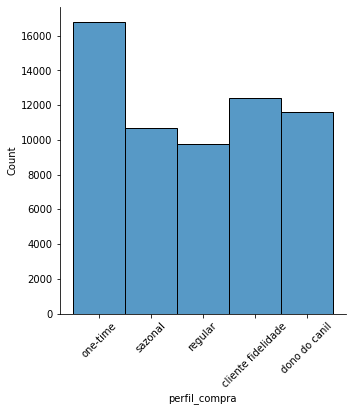

In [ ]:
import matplotlib.pyplot as plt

final_clientes["perfil_compra"], bins = pd.qcut(final_clientes["QUANTIDADE"], q = 5,
                                  labels = ["one-time", "sazonal", "regular", "cliente fidelidade", "dono do canil"],
                                   retbins = True)

print("Perfil: ", bins)
_ = sns.displot(final_clientes["perfil_compra"])
_ = plt.xticks(rotation=45)

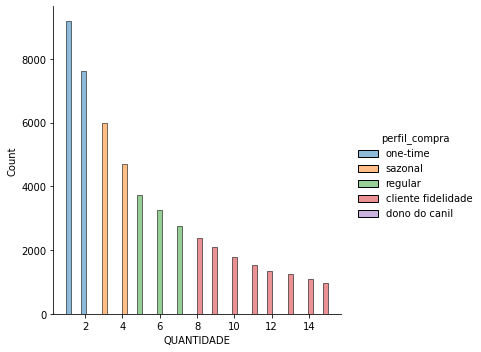

In [ ]:
_ = sns.displot(final_clientes[final_clientes["perfil_compra"] < "dono do canil"][["perfil_compra", "QUANTIDADE"]].reset_index(),
                x = "QUANTIDADE", hue = "perfil_compra")

In [ ]:
final_clientes["perfil_acessorio"] = (final_clientes["ALIMENTOS"] / final_clientes["ACESSORIOS"]) > 10
final_clientes["perfil_acessorio"].value_counts()

False    34200
True     27000
Name: perfil_acessorio, dtype: int64

## perfil compra: **one-time**
### clientes que compraram não mais que 2 items na loja durante o tempo de vendas

1.   **52% não preencheram** o campo SEXO, um pouco mais mulheres (26%) do que homens (22%)
2.   Perfil de idade bem distribuido
3.   compras distribuidas ao longo dos dias uteis, concentração sabado e poucos aos domingos
4.   **26%** compram mais aos fins de semanas
5.   **54%** vieram comprar **acessorios**
6.   cerca de **10%** de clientes **online**
7.   **81% CAES** e **13% GATOS**
8.   Interesse na area de **Farmacia**
**produtos:**
```
ALIMENTOS                0.512791
ACESSORIOS               0.170327
FARMACIA                 0.179037
HIGIENE E BELEZA         0.126778
AQUARIOS E ACESSORIOS    0.006017
```
**propostas:** Investir nos clientes online

1.   oferecer promoções para a próxima compra
2.   frete gratis acima de certo valor do carrinho
3.   mostrar outros produtos da area de **acessorios** em "pessoas tambem compraram isso" antes da finalização da compra, com classificação "NIVEL 3" diferente, ex: se a pessoa comprou um brinquedo, mostrar uma roupinha



In [ ]:
cliente_1 = final_clientes[final_clientes["perfil_compra"] == "one-time"]
cliente_1.head()

,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,IDADE_CAT,QUANTIDADE,online,Wednesday,Friday,Monday,Tuesday,Thursday,Saturday,Sunday,CAES,ROEDORES,GATOS,AVES,PEIXES,PESSOAS,ALIMENTOS,ACESSORIOS,FARMACIA,HIGIENE E BELEZA,AQUARIOS E ACESSORIOS,ANIMAL VIVO,CASA,weekend,perfil_compra,perfil_acessorio
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
74619,feminino,1986-06-03,2021-03-12,Adulto Novo,2.0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,False,one-time,False
84121,feminino,1995-06-07,2021-05-23,Jovem,2.0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,1,0,0,1,0,0,0,True,one-time,True
80446,vazio,NaT,2021-04-25,NaN,2.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,True,one-time,True
77484,vazio,NaT,2021-03-31,NaN,2.0,1,2,0,0,0,0,0,0,2,0,0,0,0,0,1,0,1,0,0,0,0,False,one-time,True
73802,feminino,1961-03-01,2021-03-05,Muito velho,2.0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,False,one-time,False


In [ ]:
cliente_1.SEXO.value_counts(True)

vazio        0.526444
feminino     0.261467
masculino    0.212089
Name: SEXO, dtype: float64

In [ ]:
cliente_1.IDADE_CAT.value_counts(True,False)

Muito velho    0.209276
Velho          0.190699
Adulto         0.196259
Adulto Novo    0.194616
Jovem          0.209150
Name: IDADE_CAT, dtype: float64

In [ ]:
cliente_1.online.value_counts(True)

0    0.902969
1    0.097031
Name: online, dtype: float64

In [ ]:
cliente_1.perfil_acessorio.value_counts(True)

True     0.544708
False    0.455292
Name: perfil_acessorio, dtype: float64

In [ ]:
cliente_1.weekend.value_counts(True)

False    0.736213
True     0.263787
Name: weekend, dtype: float64

In [ ]:
cliente_1[animais].sum() / cliente_1[animais].sum().sum()

CAES        0.810906
ROEDORES    0.019566
GATOS       0.126273
AVES        0.022132
PEIXES      0.014348
PESSOAS     0.006774
dtype: float64

In [ ]:
cliente_1[week].sum() / cliente_1[week].sum().sum()

Wednesday    0.135987
Friday       0.143091
Monday       0.142671
Tuesday      0.145235
Thursday     0.147337
Saturday     0.186599
Sunday       0.099079
dtype: float64

In [ ]:
cliente_1[produtos].sum() / cliente_1[produtos].sum().sum()

ALIMENTOS                0.512791
ACESSORIOS               0.170327
FARMACIA                 0.179037
HIGIENE E BELEZA         0.126778
AQUARIOS E ACESSORIOS    0.006017
ANIMAL VIVO              0.002777
CASA                     0.002272
dtype: float64

## perfil compra: **sazonal**
### clientes que compraram mais do que 2 e menos do que 4 items na loja durante o tempo de vendas

1.   **45% não preencheram** o campo SEXO, consideravelmente mais mulheres (32%) do que homens (22%)
2.   Perfil de idade bem distribuido
3.   compras distribuidas ao longo dos dias uteis, concentração sabado e poucos aos domingos
4.   **27%** compram mais aos fins de semana
5.   **51%** vieram comprar **acessorios**
6.   cerca de **6%** de clientes **online**
7.   **79% CAES** e **13% GATOS**

**produtos:**
```
ALIMENTOS                0.477912
ACESSORIOS               0.194883
FARMACIA                 0.157645
HIGIENE E BELEZA         0.154952
AQUARIOS E ACESSORIOS    0.007143
```
perfil bem semelhante aos one-time, ate pq pela quantidade de items, provavelmente tambm compraram uma unica vez na loja, mas consideravelmente menos clientes online



In [ ]:
cliente_2 = final_clientes[final_clientes["perfil_compra"] == "sazonal"]
cliente_2.head()

,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,IDADE_CAT,QUANTIDADE,online,Wednesday,Friday,Monday,Tuesday,Thursday,Saturday,Sunday,CAES,ROEDORES,GATOS,AVES,PEIXES,PESSOAS,ALIMENTOS,ACESSORIOS,FARMACIA,HIGIENE E BELEZA,AQUARIOS E ACESSORIOS,ANIMAL VIVO,CASA,weekend,perfil_compra,perfil_acessorio
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
85255,masculino,1970-03-17,2021-06-01,Muito velho,4.0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,2,2,0,0,0,0,0,False,sazonal,False
37037,vazio,NaT,2020-05-30,NaN,4.0,0,0,2,0,0,1,1,0,4,0,0,0,0,0,2,0,2,0,0,0,0,False,sazonal,True
66704,masculino,1969-11-09,2021-01-16,Muito velho,4.0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,1,1,0,1,0,0,0,True,sazonal,False
37319,vazio,NaT,2020-06-02,NaN,4.0,0,0,0,0,0,3,0,0,3,0,0,0,0,0,0,0,1,2,0,0,0,False,sazonal,False
80939,feminino,1983-08-27,2021-04-30,Adulto,4.0,0,1,3,0,0,0,0,0,4,0,0,0,0,0,1,1,2,0,0,0,0,False,sazonal,False


In [ ]:
cliente_2.SEXO.value_counts(True)

vazio        0.456846
feminino     0.321994
masculino    0.221160
Name: SEXO, dtype: float64

In [ ]:
cliente_2.IDADE_CAT.value_counts(True,False)

Muito velho    0.204256
Velho          0.192395
Adulto         0.195535
Adulto Novo    0.202861
Jovem          0.204954
Name: IDADE_CAT, dtype: float64

In [ ]:
cliente_2.online.value_counts(True)

0    0.937307
1    0.062693
Name: online, dtype: float64

In [ ]:
cliente_2.perfil_acessorio.value_counts(True)

True     0.514666
False    0.485334
Name: perfil_acessorio, dtype: float64

In [ ]:
cliente_2.weekend.value_counts(True)

False    0.731422
True     0.268578
Name: weekend, dtype: float64

In [ ]:
cliente_2[animais].sum() / cliente_2[animais].sum().sum()

CAES        0.790070
ROEDORES    0.026172
GATOS       0.132557
AVES        0.023449
PEIXES      0.015223
PESSOAS     0.012530
dtype: float64

In [ ]:
cliente_2[week].sum() / cliente_2[week].sum().sum()

Wednesday    0.135806
Friday       0.141160
Monday       0.136889
Tuesday      0.142886
Thursday     0.141687
Saturday     0.191949
Sunday       0.109622
dtype: float64

In [ ]:
cliente_2[produtos].sum() / cliente_2[produtos].sum().sum()

ALIMENTOS                0.477912
ACESSORIOS               0.194883
FARMACIA                 0.157645
HIGIENE E BELEZA         0.154952
AQUARIOS E ACESSORIOS    0.007143
ANIMAL VIVO              0.004567
CASA                     0.002898
dtype: float64

## perfil compra: **regular**
### clientes que compraram mais do que 4 e menos do que 7 items na loja durante o tempo de vendas

1.   **44% não preencheram** o campo SEXO, consideravelmente mais mulheres (33%) do que homens (22%)
2.   Perfil de idade bem distribuido
3.   compras distribuidas ao longo dos dias uteis, concentração sabado e poucos aos domingos
4.   **27%** compram mais aos fins de semana
5.   **44%** vieram comprar **acessorios**
6.   cerca de **6%** de clientes **online**
7.   **78% CAES** e **14% GATOS**

**produtos:**
```
ALIMENTOS                0.481400
ACESSORIOS               0.201766
FARMACIA                 0.137928
HIGIENE E BELEZA         0.160557
AQUARIOS E ACESSORIOS    0.008712
```
perfil bem semelhante aos sazonais

**observa-se que o interesse em acessorios esta diminuindo**


In [ ]:
cliente_3 = final_clientes[final_clientes["perfil_compra"] == "regular"]
cliente_3.head()

,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,IDADE_CAT,QUANTIDADE,online,Wednesday,Friday,Monday,Tuesday,Thursday,Saturday,Sunday,CAES,ROEDORES,GATOS,AVES,PEIXES,PESSOAS,ALIMENTOS,ACESSORIOS,FARMACIA,HIGIENE E BELEZA,AQUARIOS E ACESSORIOS,ANIMAL VIVO,CASA,weekend,perfil_compra,perfil_acessorio
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
46295,vazio,NaT,2020-09-05,NaN,7.0,0,0,0,1,3,1,2,0,7,0,0,0,0,0,7,0,0,0,0,0,0,False,regular,True
1437,vazio,NaT,2017-05-08,NaN,7.0,1,1,0,0,0,3,3,0,7,0,0,0,0,0,1,5,1,0,0,0,0,False,regular,False
46511,feminino,1991-07-27,2020-09-08,Adulto Novo,7.0,0,2,0,0,5,0,0,0,7,0,0,0,0,0,4,2,0,1,0,0,0,False,regular,False
53583,vazio,NaT,2020-10-30,NaN,7.0,0,0,0,2,1,0,0,4,6,0,0,0,0,1,4,0,2,1,0,0,0,True,regular,True
46864,vazio,NaT,2020-09-10,NaN,7.0,0,0,5,0,0,0,2,0,6,0,1,0,0,0,1,2,2,2,0,0,0,False,regular,False


In [ ]:
cliente_3.SEXO.value_counts(True)

vazio        0.438051
feminino     0.338769
masculino    0.223179
Name: SEXO, dtype: float64

In [ ]:
cliente_3.IDADE_CAT.value_counts(True,False)

Muito velho    0.189355
Velho          0.198071
Adulto         0.208828
Adulto Novo    0.206046
Jovem          0.197700
Name: IDADE_CAT, dtype: float64

In [ ]:
cliente_3.online.value_counts(True)

0    0.940513
1    0.059487
Name: online, dtype: float64

In [ ]:
cliente_3.perfil_acessorio.value_counts(True)

False    0.557641
True     0.442359
Name: perfil_acessorio, dtype: float64

In [ ]:
cliente_3.weekend.value_counts(True)

False    0.726051
True     0.273949
Name: weekend, dtype: float64

In [ ]:
cliente_3[animais].sum() / cliente_3[animais].sum().sum()

CAES        0.777225
ROEDORES    0.026078
GATOS       0.136810
AVES        0.026772
PEIXES      0.018870
PESSOAS     0.014244
dtype: float64

In [ ]:
cliente_3[week].sum() / cliente_3[week].sum().sum()

Wednesday    0.137018
Friday       0.139406
Monday       0.134725
Tuesday      0.137981
Thursday     0.137075
Saturday     0.202358
Sunday       0.111436
dtype: float64

In [ ]:
cliente_3[produtos].sum() / cliente_3[produtos].sum().sum()

ALIMENTOS                0.481400
ACESSORIOS               0.201766
FARMACIA                 0.137928
HIGIENE E BELEZA         0.160557
AQUARIOS E ACESSORIOS    0.008712
ANIMAL VIVO              0.006688
CASA                     0.002949
dtype: float64

## perfil compra: **cliente fidelidade**
### clientes que compraram mais do que 7 e menos do que 15 items na loja durante o tempo de vendas

1.   **43% não preencheram** o campo SEXO, um pouco mais mulheres (34%) do que homens (22%)
2.   Perfil de idade bem distribuido
3.   compras distribuidas ao longo dos dias uteis, concentração sabado e poucos aos domingos
4.   **25%** compra mais aos fins de semana
5.   **34%** vieram comprar **acessorios**
6.   cerca de **6%** de clientes **online**
7.   **77% CAES** e **15% GATOS**

**produtos:**
```
ALIMENTOS                0.486420
ACESSORIOS               0.198303
FARMACIA                 0.130067
HIGIENE E BELEZA         0.167222
AQUARIOS E ACESSORIOS    0.008765
```

Acho que esse grupo vale a pena oferecer as promoções para compras de mais de 1 item do mesmo tipo (compre 3 pague 2)

**observa-se que o interesse em acessorios esta diminuindo**


In [ ]:
cliente_4 = final_clientes[final_clientes["perfil_compra"] == "cliente fidelidade"]
cliente_4.head()

,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,IDADE_CAT,QUANTIDADE,online,Wednesday,Friday,Monday,Tuesday,Thursday,Saturday,Sunday,CAES,ROEDORES,GATOS,AVES,PEIXES,PESSOAS,ALIMENTOS,ACESSORIOS,FARMACIA,HIGIENE E BELEZA,AQUARIOS E ACESSORIOS,ANIMAL VIVO,CASA,weekend,perfil_compra,perfil_acessorio
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54853,feminino,NaT,2020-11-09,NaN,15.0,0,0,0,1,12,1,0,0,5,0,9,0,0,0,7,2,1,4,0,0,0,False,cliente fidelidade,False
50976,feminino,1992-07-06,2020-10-12,Adulto Novo,15.0,0,0,1,5,5,2,0,0,13,0,0,0,0,0,5,5,2,1,0,0,0,False,cliente fidelidade,False
47690,feminino,1978-11-03,2020-09-16,Velho,15.0,1,5,0,0,0,1,7,2,14,0,0,0,0,1,7,2,0,6,0,0,0,True,cliente fidelidade,False
63642,vazio,NaT,2020-12-28,NaN,15.0,1,0,0,13,0,1,0,0,12,0,2,0,0,0,3,2,4,5,0,0,0,False,cliente fidelidade,False
59702,masculino,1984-05-23,2020-12-05,Adulto,15.0,0,0,2,1,1,0,3,6,13,0,0,0,0,0,6,1,4,2,0,0,0,True,cliente fidelidade,False


In [ ]:
cliente_4.SEXO.value_counts(True)

vazio        0.432919
feminino     0.344285
masculino    0.222796
Name: SEXO, dtype: float64

In [ ]:
cliente_4.IDADE_CAT.value_counts(True,False)

Muito velho    0.190665
Velho          0.213486
Adulto         0.206125
Adulto Novo    0.202591
Jovem          0.187132
Name: IDADE_CAT, dtype: float64

In [ ]:
cliente_4.online.value_counts(True)

0    0.939215
1    0.060785
Name: online, dtype: float64

In [ ]:
cliente_4.perfil_acessorio.value_counts(True)

False    0.658218
True     0.341782
Name: perfil_acessorio, dtype: float64

In [ ]:
cliente_4.weekend.value_counts(True)

False    0.748386
True     0.251614
Name: weekend, dtype: float64

In [ ]:
cliente_4[animais].sum() / cliente_4[animais].sum().sum()

CAES        0.769225
ROEDORES    0.025939
GATOS       0.146646
AVES        0.024802
PEIXES      0.017352
PESSOAS     0.016037
dtype: float64

In [ ]:
cliente_4[week].sum() / cliente_4[week].sum().sum()

Wednesday    0.135313
Friday       0.138984
Monday       0.132548
Tuesday      0.139095
Thursday     0.138899
Saturday     0.203592
Sunday       0.111569
dtype: float64

In [ ]:
cliente_4[produtos].sum() / cliente_4[produtos].sum().sum()

ALIMENTOS                0.486420
ACESSORIOS               0.198303
FARMACIA                 0.130067
HIGIENE E BELEZA         0.167222
AQUARIOS E ACESSORIOS    0.008765
ANIMAL VIVO              0.005753
CASA                     0.003470
dtype: float64

## perfil compra: **dono do canil**
### clientes que compraram mais do que 15 e menos do que 810 items na loja durante o tempo de vendas

1.   **47% não preencheram** o campo SEXO, um pouco mais mulheres (33%) do que homens (19%)
2.   Perfil de idade deslocado para os mais velhos
3.   compras distribuidas ao longo dos dias uteis, concentração sabado e poucos aos domingos
4.   **20%** compra mais aos fins de semana
5.   **33%** vieram comprar **acessorios**
6.   cerca de **7,6%** de clientes **online**
7.   **70% CAES** e **21% GATOS**

**produtos:**
```
ALIMENTOS                0.543759
ACESSORIOS               0.162186
FARMACIA                 0.117492
HIGIENE E BELEZA         0.159830
AQUARIOS E ACESSORIOS    0.008106
```

### Acho que esse é o grupo de clientes mais importantes:

**propostas:**
*   devido ao perfil de idade mais velho, as compras de alimentos em grande quantidade e **92%** das compras serem a **loja fisica**, acho importante que se garanta uma boa experiencia de compras
> uma **infraestrutura** adequada como bons locais para vagas de idosos, carrinhos e funcionarios instruidos a ajudarem esses clientes
*   comparando com os grupos anteriores, observa-se um interesse maior nas compras online
> investir em clientes onlines **recorrentes** como sistema de milhas e pontos
>
> desconto no frete para **compras grandes**
>
> **informativos** nas lojas fisicas para auxiliar os clientes mais velhos a se familiarizarem com a tecnologia
*    tambem comparando, observa-se uma venda maior de produtos destinados a gatos
> aumentar a oferta de produtos **alimenticios** de gatos
>
> talvez investir em **acessorios** para gatos possa ser um mercado ainda pouco explorado

**observa-se que o interesse em acessorios esta diminuindo**


In [ ]:
cliente_5 = final_clientes[final_clientes["perfil_compra"] == "dono do canil"]
cliente_5.head()

,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,IDADE_CAT,QUANTIDADE,online,Wednesday,Friday,Monday,Tuesday,Thursday,Saturday,Sunday,CAES,ROEDORES,GATOS,AVES,PEIXES,PESSOAS,ALIMENTOS,ACESSORIOS,FARMACIA,HIGIENE E BELEZA,AQUARIOS E ACESSORIOS,ANIMAL VIVO,CASA,weekend,perfil_compra,perfil_acessorio
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36010,feminino,NaT,2020-05-16,NaN,810.0,1,29,18,20,25,15,37,3,44,0,103,0,0,0,82,38,1,26,0,0,0,False,dono do canil,False
32703,feminino,NaT,2020-03-11,NaN,809.0,0,21,39,13,46,37,27,0,51,0,132,0,0,0,123,1,28,31,0,0,0,False,dono do canil,True
38242,feminino,NaT,2020-11-13,NaN,742.0,0,31,23,26,10,18,16,9,61,1,70,0,0,1,105,7,1,19,0,0,1,False,dono do canil,True
60916,feminino,1965-03-06,2020-12-12,Muito velho,730.0,0,27,64,95,22,15,30,10,171,0,92,0,0,0,210,0,36,17,0,0,0,False,dono do canil,True
40951,feminino,1955-07-09,2020-08-20,Muito velho,730.0,0,11,16,0,7,21,68,0,7,0,114,0,0,2,116,2,0,5,0,0,0,True,dono do canil,True


In [ ]:
cliente_5.SEXO.value_counts(True)

vazio        0.470299
feminino     0.336470
masculino    0.193231
Name: SEXO, dtype: float64

In [ ]:
cliente_5.IDADE_CAT.value_counts(True,False)

Muito velho    0.226305
Velho          0.223645
Adulto         0.205853
Adulto Novo    0.189059
Jovem          0.155138
Name: IDADE_CAT, dtype: float64

In [ ]:
cliente_5.online.value_counts(True)

0    0.923329
1    0.076671
Name: online, dtype: float64

In [ ]:
cliente_5.perfil_acessorio.value_counts(True)

False    0.671473
True     0.328527
Name: perfil_acessorio, dtype: float64

In [ ]:
cliente_5.weekend.value_counts(True)

False    0.796236
True     0.203764
Name: weekend, dtype: float64

In [ ]:
cliente_5[animais].sum() / cliente_5[animais].sum().sum()

CAES        0.706746
ROEDORES    0.019590
GATOS       0.216728
AVES        0.022944
PEIXES      0.016433
PESSOAS     0.017559
dtype: float64

In [ ]:
cliente_5[week].sum() / cliente_5[week].sum().sum()

Wednesday    0.139960
Friday       0.143079
Monday       0.133224
Tuesday      0.138656
Thursday     0.145599
Saturday     0.190414
Sunday       0.109069
dtype: float64

In [ ]:
cliente_5[produtos].sum() / cliente_5[produtos].sum().sum()

ALIMENTOS                0.543759
ACESSORIOS               0.162186
FARMACIA                 0.117492
HIGIENE E BELEZA         0.159830
AQUARIOS E ACESSORIOS    0.008106
ANIMAL VIVO              0.005285
CASA                     0.003342
dtype: float64

# K-means (sklearn)

## Clusterização (4 grupos)

colunas utilizadas:
*   online (sim ou não)
*   animais ('CAES', 'ROEDORES', 'GATOS', 'AVES', 'PEIXES', 'PESSOAS')
*   produtos ('ALIMENTOS', 'ACESSORIOS',  'FARMACIA', 'HIGIENE E BELEZA', 'AQUARIOS E ACESSORIOS', 'ANIMAL VIVO', 'CASA')



In [1]:
list(produtos)

NameError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(final_clientes[["online"] + list(animais) + list(produtos)])
clientes_normalizado = scaler.transform(final_clientes[["online"] + list(animais) + list(produtos)])
clientes_normalizado

In [ ]:
from sklearn.cluster import KMeans
sse = {}

for k in range(1, 11):
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clientes_normalizado)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
model = KMeans(n_clusters = 4, random_state = 1)
model.fit(clientes_normalizado)
final_clientes["cluster"] = model.labels_
_ = final_clientes["cluster"].hist()
final_clientes["cluster"].value_counts(True)

In [ ]:
for i in range(4):
    print("Perfil de clientes ", i)
    print(final_clientes[final_clientes["cluster"] == i].perfil_compra.value_counts(True, False))
    print("\n")

## PCA (2 component)

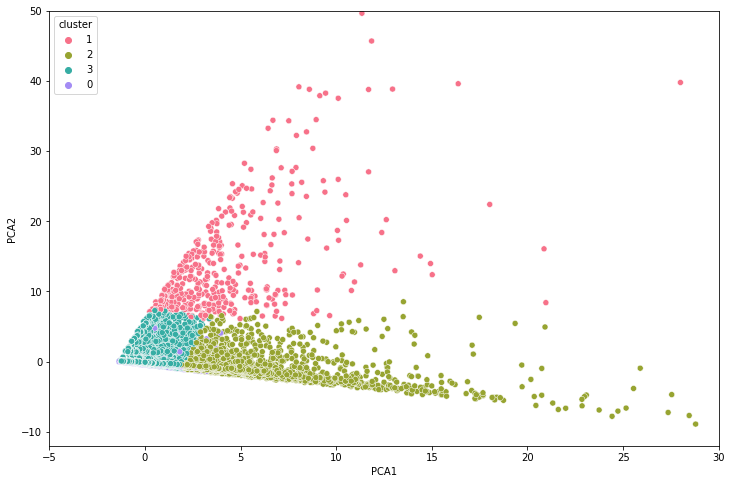

In [ ]:
#@title PCA scatterplot
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(clientes_normalizado)
final_clientes["PCA1"] = pca_fit[:,0]
final_clientes["PCA2"] = pca_fit[:,1]

plt.figure(figsize = (12,8))
plt.xlim(-5, 30)
plt.ylim(-12, 50)
_ = sns.scatterplot(data = final_clientes, x = "PCA1", y = "PCA2", hue = "cluster",
                    palette = sns.color_palette("husl", 4),
                    hue_order = [1,2,3,0])

## cluster: **0** (0.7% dos clientes)

1.   **81% não preencheram** o campo SEXO
2.   Maior parte são **jovens** e **adultos novos**
3.   compras distribuidas ao longo dos dias uteis, **inclusive sabado** e poucos aos domingos
4.   **19%** compram mais aos fins de semanas
5.   **50%** vieram comprar **acessorios**
6.   cerca de **100%** de clientes **online**
7.   **72%** CAES e **23%** GATOS
8.   **perfil compra:** distribuido, maioria **one-time** (38%)
9.   interesse em produtos de **Farmacia**
**produtos:**
```
Nivel 2
ALIMENTOS                0.508514
ACESSORIOS               0.133640
FARMACIA                 0.172860
HIGIENE E BELEZA         0.180457
```
```
Nivel 3
RACOES                          0.404326
HIGIENE E LIMPEZA               0.136035
PETISCOS E OSSINHOS             0.076270
PULGAS - CARRAPATOS - VERMES    0.059653
BRINQUEDOS                      0.057558
UTENSILIOS PARA BANHO           0.044422
VITAMINAS E SUPLEMENTOS         0.028704
```
**interepretação:**
*    Grupo composto apenas por vendas **online**, maior parte são **jovens** e provalvemente são clientes realmente **one-time**, interesse principal são artigos de **CAES**, com destaque para o setor de **Farmacia**

**propostas:**
*   o setor de farmacia não costuma gerar clientes que retornam, por isso é importante vender o maximo possivel nessa compra, uma proposta seria fazer indicações de produtos ex:
> comprou antipulgas/carrapatos => indicar escova para pelo de cachorros
>
> comprou vermifugo => indicar tapetes higienicos
>
> comprou anti-inflamatorio => indicar roupa pos-cirurgica (castração)


In [ ]:
cliente_0k = final_clientes[final_clientes["cluster"] == 0]
cliente_0k.head()

In [ ]:
cliente_0k.perfil_compra.value_counts(True)

In [ ]:
cliente_0k.SEXO.value_counts(True)

vazio        0.808341
feminino     0.142690
masculino    0.048969
Name: SEXO, dtype: float64

In [ ]:
cliente_0k.IDADE_CAT.value_counts(True,False)

Muito velho    0.117048
Velho          0.151399
Adulto         0.193384
Adulto Novo    0.276081
Jovem          0.262087
Name: IDADE_CAT, dtype: float64

In [ ]:
cliente_0k.online.value_counts(True)

1    1.0
Name: online, dtype: float64

In [ ]:
cliente_0k.perfil_acessorio.value_counts(True)

True     0.503515
False    0.496485
Name: perfil_acessorio, dtype: float64

In [ ]:
cliente_0k.weekend.value_counts(True)

False    0.812559
True     0.187441
Name: weekend, dtype: float64

In [ ]:
cliente_0k[animais].sum() / cliente_0k[animais].sum().sum()

CAES        0.718686
ROEDORES    0.023652
GATOS       0.229595
AVES        0.017589
PEIXES      0.005389
PESSOAS     0.005090
dtype: float64

In [ ]:
cliente_0k[week].sum() / cliente_0k[week].sum().sum()

Wednesday    0.146602
Friday       0.151053
Monday       0.157822
Tuesday      0.148809
Thursday     0.141254
Saturday     0.163955
Sunday       0.090505
dtype: float64

In [ ]:
cliente_0k[produtos].sum() / cliente_0k[produtos].sum().sum()

ALIMENTOS                0.508514
ACESSORIOS               0.133640
FARMACIA                 0.172860
HIGIENE E BELEZA         0.180457
AQUARIOS E ACESSORIOS    0.002245
ANIMAL VIVO              0.001310
CASA                     0.000973
dtype: float64

In [ ]:
full_vendas[full_vendas["ID_CLIENTE"].isin(cliente_0k.index)]["NIVEL 3"].value_counts(True).head(7)

RACOES                          0.404326
HIGIENE E LIMPEZA               0.136035
PETISCOS E OSSINHOS             0.076270
PULGAS - CARRAPATOS - VERMES    0.059653
BRINQUEDOS                      0.057558
UTENSILIOS PARA BANHO           0.044422
VITAMINAS E SUPLEMENTOS         0.028704
Name: NIVEL 3, dtype: float64

## cluster: **1** (7% dos clientes)

1.   **35% não preencheram** o campo SEXO, mais **homens (37%)** do que mulheres (27%)
2.   Maior parte são **adultos** e **velhos**
3.   compras distribuidas ao longo dos dias uteis, concentração sabado e poucos aos domingos
4.   **26%** compram mais aos fins de semanas
5.   **42%** vieram comprar **acessorios**
6.   cerca de **3%** de clientes **online**
7.   **47,5%** peixes e **37%** CAES
8.   **perfil compra:** 66% donos de canil e 28% cliente fidelidade
**produtos:**
```
Nivel 2
ALIMENTOS                0.361646
ACESSORIOS               0.122320
FARMACIA                 0.065054
HIGIENE E BELEZA         0.094099
AQUARIOS E ACESSORIOS    0.235111
ANIMAL VIVO              0.118014
CASA                     0.003757
```
```
Nivel 3
RACOES                      0.264614
BOMBAS E CONDICIONADORES    0.124702
                            0.118288
DECORACAO E ILUMINACAO      0.088510
```
**interepretação:**
*    maioria são clientes **homens** na faixa dos **35-50 anos** que fazem **grandes compras**, tem interesse em artigos para **peixe**, compram um quantidade relativamente grande de **acessorios de aquario** e **animal vivo** e ainda não fazem muito uso das compras **online**

**propostas:**
*   o setor de peixes é pouco explorado pela loja, apesar de atrair clientes dispostos a fazer compras em grande quantidade, investir em acessorios de aquario que sejam atraentes para pessoas com perfil de homens adultos
*   dado a dificuldade em se vender artigos como animais vivos e aquarios online, poderia inverstir em produtos como comida, enfeites e acessorios de aquario (promoções do tipo "artigos que ganham frete gratis", ou em sales sazonais)



In [ ]:
cliente_1k = final_clientes[final_clientes["cluster"] == 1]
cliente_1k.head()

,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,IDADE_CAT,QUANTIDADE,online,Wednesday,Friday,Monday,Tuesday,Thursday,Saturday,Sunday,CAES,ROEDORES,GATOS,AVES,PEIXES,PESSOAS,ALIMENTOS,ACESSORIOS,FARMACIA,HIGIENE E BELEZA,AQUARIOS E ACESSORIOS,ANIMAL VIVO,CASA,weekend,perfil_compra,perfil_acessorio,cluster,PCA1,PCA2
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29057,vazio,NaT,2021-05-14,NaN,510.0,0,61,51,32,34,158,45,16,236,15,97,13,16,20,205,59,49,71,5,7,1,False,dono do canil,False,1,65.539811,8.630793
2014,vazio,NaT,2017-05-25,NaN,198.0,0,5,4,4,0,1,16,17,7,0,30,2,6,2,29,2,1,9,5,0,1,True,dono do canil,True,1,7.156674,6.162512
69315,vazio,NaT,2021-01-31,NaN,181.0,0,0,15,30,17,27,9,0,38,13,3,11,33,0,19,37,1,8,14,19,0,False,dono do canil,False,1,22.996440,53.367353
46618,masculino,1985-07-31,2020-09-08,Adulto,175.0,1,12,12,6,12,3,0,2,35,0,2,0,8,2,33,2,2,2,7,1,0,False,dono do canil,True,1,6.323591,10.343133
51609,vazio,NaT,2020-10-17,NaN,161.0,0,34,9,30,35,18,5,5,113,3,0,7,9,4,98,16,6,6,4,3,3,False,dono do canil,False,1,20.961505,8.412140


In [ ]:
cliente_1k.perfil_compra.value_counts(True)

dono do canil         0.658120
cliente fidelidade    0.279915
regular               0.061966
sazonal               0.000000
one-time              0.000000
Name: perfil_compra, dtype: float64

In [ ]:
cliente_1k.SEXO.value_counts(True)

masculino    0.373932
vazio        0.354701
feminino     0.271368
Name: SEXO, dtype: float64

In [ ]:
cliente_1k.IDADE_CAT.value_counts(True, False)

Muito velho    0.125424
Velho          0.257627
Adulto         0.308475
Adulto Novo    0.172881
Jovem          0.135593
Name: IDADE_CAT, dtype: float64

In [ ]:
cliente_1k.online.value_counts(True)

0    0.970085
1    0.029915
Name: online, dtype: float64

In [ ]:
cliente_1k.perfil_acessorio.value_counts(True)

False    0.576923
True     0.423077
Name: perfil_acessorio, dtype: float64

In [ ]:
cliente_1k.weekend.value_counts(True)

False    0.707265
True     0.292735
Name: weekend, dtype: float64

In [ ]:
cliente_1k[animais].sum() / cliente_1k[animais].sum().sum()

CAES        0.369800
ROEDORES    0.033901
GATOS       0.088785
AVES        0.051768
PEIXES      0.435221
PESSOAS     0.020524
dtype: float64

In [ ]:
cliente_1k[week].sum() / cliente_1k[week].sum().sum()

Wednesday    0.117604
Friday       0.151532
Monday       0.123365
Tuesday      0.129218
Thursday     0.139003
Saturday     0.210334
Sunday       0.128944
dtype: float64

In [ ]:
cliente_1k[produtos].sum() / cliente_1k[produtos].sum().sum()

ALIMENTOS                0.361646
ACESSORIOS               0.122320
FARMACIA                 0.065054
HIGIENE E BELEZA         0.094099
AQUARIOS E ACESSORIOS    0.235111
ANIMAL VIVO              0.118014
CASA                     0.003757
dtype: float64

In [ ]:
full_vendas[full_vendas["ID_CLIENTE"].isin(cliente_1k.index)]["NIVEL 3"].value_counts(True).head(7)

RACOES                      0.264614
BOMBAS E CONDICIONADORES    0.124702
                            0.118288
DECORACAO E ILUMINACAO      0.088510
HIGIENE E LIMPEZA           0.069635
PETISCOS E OSSINHOS         0.056350
BRINQUEDOS                  0.042514
Name: NIVEL 3, dtype: float64

## cluster: **2** (8% dos clientes)

1.   **47% não preencheram** o campo SEXO, mais **mulheres (34%)** do que homens (19%)
2.   Maior parte são **velhos**
3.   compras distribuidas ao longo dos dias uteis, concentração sabado e poucos aos domingos
4.   **19%** compram mais aos fins de semanas
5.   **24%** vieram comprar **acessorios**
6.   cerca de **5%** de clientes **online**
7.   **72%** CAES e **21%** GATOS
8.   **perfil compra:** 98% donos de canil e 2% cliente fidelidade
**produtos:**
```
Nivel 2
ALIMENTOS                0.527029
ACESSORIOS               0.173150
FARMACIA                 0.122116
HIGIENE E BELEZA         0.168547
```
```
Nivel 4
RACAO SECA                       0.181360
RACAO UMIDA (SACHES E LATAS)     0.148498
BISCOITOS - BIFINHOS - SNACKS    0.083551
                                 0.069706
TAPETES HIGIENICOS               0.046186
```
**interepretação:**
*    maioria são clientes **mulheres** na faixa dos **40-70 anos** que fazem **grandes compras**, tem interesse em **alimentos** para **CAES**, pouco interesse no setor de **acessorios** e ainda não fazem muito uso das compras **online**
*    acho que são clientes que ja estão bem estabelecidos como clientes

**propostas:**
*   percebe-se uma disponibilidade maior ao longo da semana (compras em dias uteis)
> uma forma de se agradar e tenta aliviar um pouco a carga aos sabados seriam os feirões com promoções de artigos especificos em determinado dia, ex: 4ª feira da ração
*   promoções como acumular milhas / pontos é uma boa forma de recompensar os clientes que compram muito
*   alem do que ja foi mencionado em *perfil compra: dono de canil*

In [ ]:
cliente_2k = final_clientes[final_clientes["cluster"] == 2]
cliente_2k.head()

,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,IDADE_CAT,QUANTIDADE,online,Wednesday,Friday,Monday,Tuesday,Thursday,Saturday,Sunday,CAES,ROEDORES,GATOS,AVES,PEIXES,PESSOAS,ALIMENTOS,ACESSORIOS,FARMACIA,HIGIENE E BELEZA,AQUARIOS E ACESSORIOS,ANIMAL VIVO,CASA,weekend,perfil_compra,perfil_acessorio,cluster,PCA1,PCA2
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36010,feminino,NaT,2020-05-16,NaN,810.0,1,29,18,20,25,15,37,3,44,0,103,0,0,0,82,38,1,26,0,0,0,False,dono do canil,False,2,18.230170,-5.095538
32703,feminino,NaT,2020-03-11,NaN,809.0,0,21,39,13,46,37,27,0,51,0,132,0,0,0,123,1,28,31,0,0,0,False,dono do canil,True,2,21.609636,-6.823534
38242,feminino,NaT,2020-11-13,NaN,742.0,0,31,23,26,10,18,16,9,61,1,70,0,0,1,105,7,1,19,0,0,1,False,dono do canil,True,2,15.321088,-4.302022
60916,feminino,1965-03-06,2020-12-12,Muito velho,730.0,0,27,64,95,22,15,30,10,171,0,92,0,0,0,210,0,36,17,0,0,0,False,dono do canil,True,2,28.788057,-8.902413
40951,feminino,1955-07-09,2020-08-20,Muito velho,730.0,0,11,16,0,7,21,68,0,7,0,114,0,0,2,116,2,0,5,0,0,0,True,dono do canil,True,2,11.678157,-3.507005


In [ ]:
cliente_2k.perfil_compra.value_counts(True, False)

one-time              0.000000
sazonal               0.000000
regular               0.000197
cliente fidelidade    0.018350
dono do canil         0.981452
Name: perfil_compra, dtype: float64

In [ ]:
cliente_2k.SEXO.value_counts(True)

vazio        0.471784
feminino     0.339779
masculino    0.188437
Name: SEXO, dtype: float64

In [ ]:
cliente_2k.IDADE_CAT.value_counts(True,False)

Muito velho    0.214768
Velho          0.233508
Adulto         0.213643
Adulto Novo    0.187781
Jovem          0.150300
Name: IDADE_CAT, dtype: float64

In [ ]:
cliente_2k.online.value_counts(True)

0    0.952841
1    0.047159
Name: online, dtype: float64

In [ ]:
cliente_2k.perfil_acessorio.value_counts(True)

False    0.756709
True     0.243291
Name: perfil_acessorio, dtype: float64

In [ ]:
cliente_2k.weekend.value_counts(True)

False    0.810773
True     0.189227
Name: weekend, dtype: float64

In [ ]:
cliente_2k[animais].sum() / cliente_2k[animais].sum().sum()

CAES        0.718428
ROEDORES    0.020815
GATOS       0.212324
AVES        0.021623
PEIXES      0.003623
PESSOAS     0.023187
dtype: float64

In [ ]:
cliente_2k[week].sum() / cliente_2k[week].sum().sum()

Wednesday    0.139379
Friday       0.142203
Monday       0.132710
Tuesday      0.138816
Thursday     0.148851
Saturday     0.189960
Sunday       0.108081
dtype: float64

In [ ]:
cliente_2k[produtos].sum() / cliente_2k[produtos].sum().sum()

ALIMENTOS                0.527029
ACESSORIOS               0.173150
FARMACIA                 0.122116
HIGIENE E BELEZA         0.168547
AQUARIOS E ACESSORIOS    0.001475
ANIMAL VIVO              0.002221
CASA                     0.005463
dtype: float64

In [ ]:
cliente_2k.index

Int64Index([36010, 32703, 38242, 60916, 40951, 49325, 33915, 34277, 21340,
            32867,
            ...
            76233, 48588, 49739, 51769,  8408, 46936, 66902, 21207, 63528,
            78562],
           dtype='int64', name='ID_CLIENTE', length=5068)

In [ ]:
full_vendas[full_vendas["ID_CLIENTE"].isin(cliente_2k.index)]["NIVEL 4"].value_counts(True).head(7)

RACAO SECA                       0.181360
RACAO UMIDA (SACHES E LATAS)     0.148498
BISCOITOS - BIFINHOS - SNACKS    0.083551
                                 0.069706
TAPETES HIGIENICOS               0.046186
OSSINHOS E PALITOS               0.041359
AREIAS E GRANULADOS              0.039722
Name: NIVEL 4, dtype: float64

## cluster: **3** (83% dos clientes)

1.   **44% não preencheram** o campo SEXO, mais **mulheres (33%)** do que homens (23%)
2.   Idade bem distribuida
3.   compras distribuidas ao longo dos dias uteis, concentração sabado e poucos aos domingos
4.   **26%** compram mais aos fins de semanas
5.   **46%** vieram comprar **acessorios**
6.   cerca de **0%** de clientes **online**
7.   **76%** CAES e **16%** GATOS
8.   **perfil compra:** bem distribuido, maioria **one-time** (29,5%)
**produtos:**
```
ALIMENTOS                0.521372
ACESSORIOS               0.184167
FARMACIA                 0.129218
HIGIENE E BELEZA         0.154759
```
**interepretação:**
*    perfil bem esparço, por isso acho dificil uma proposta que mire especificamente nesse grupo
*    ainda não fazem muito uso das compras **online** 

In [ ]:
cliente_3k = final_clientes[final_clientes["cluster"] == 3]
cliente_3k.head()

,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,IDADE_CAT,QUANTIDADE,online,Wednesday,Friday,Monday,Tuesday,Thursday,Saturday,Sunday,CAES,ROEDORES,GATOS,AVES,PEIXES,PESSOAS,ALIMENTOS,ACESSORIOS,FARMACIA,HIGIENE E BELEZA,AQUARIOS E ACESSORIOS,ANIMAL VIVO,CASA,weekend,perfil_compra,perfil_acessorio,cluster,PCA1,PCA2
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9206,vazio,NaT,2018-03-11,NaN,239.0,0,1,4,2,2,2,11,5,3,0,22,0,0,2,26,0,0,1,0,0,0,True,dono do canil,True,3,2.016348,-0.716320
76354,masculino,1984-01-13,2021-03-24,Adulto,208.0,0,9,0,3,0,0,6,0,1,0,17,0,0,0,13,0,0,5,0,0,0,False,dono do canil,True,3,0.895034,-0.533941
37060,vazio,NaT,2020-05-30,NaN,173.0,0,4,0,11,0,0,3,5,2,0,21,0,0,0,22,1,0,0,0,0,0,False,dono do canil,True,3,0.939074,-0.532753
15966,feminino,NaT,2019-04-13,NaN,169.0,0,8,2,3,3,1,6,3,8,0,18,0,0,0,23,0,1,2,0,0,0,False,dono do canil,True,3,1.454260,-0.702137
56657,masculino,1990-07-13,2020-11-18,Adulto Novo,163.0,0,7,3,0,2,4,0,4,20,0,0,0,0,0,20,0,0,0,0,0,0,False,dono do canil,True,3,0.651965,-0.444251


In [ ]:
cliente_3k.perfil_compra.value_counts(True, False)

one-time              0.295315
sazonal               0.194607
regular               0.177835
cliente fidelidade    0.222080
dono do canil         0.110164
Name: perfil_compra, dtype: float64

In [ ]:
cliente_3k.SEXO.value_counts(True)

vazio        0.443575
feminino     0.327613
masculino    0.228812
Name: SEXO, dtype: float64

In [ ]:
cliente_3k.IDADE_CAT.value_counts(True,False)

Muito velho    0.206514
Velho          0.201353
Adulto         0.200214
Adulto Novo    0.197829
Jovem          0.194091
Name: IDADE_CAT, dtype: float64

In [ ]:
cliente_3k.online.value_counts(True)

0    1.0
Name: online, dtype: float64

In [ ]:
cliente_3k.perfil_acessorio.value_counts(True)

False    0.544323
True     0.455677
Name: perfil_acessorio, dtype: float64

In [ ]:
cliente_3k.weekend.value_counts(True)

False    0.736322
True     0.263678
Name: weekend, dtype: float64

In [ ]:
cliente_3k[animais].sum() / cliente_3k[animais].sum().sum()

CAES        0.763895
ROEDORES    0.022239
GATOS       0.165882
AVES        0.024573
PEIXES      0.010953
PESSOAS     0.012458
dtype: float64

In [ ]:
cliente_3k[week].sum() / cliente_3k[week].sum().sum()

Wednesday    0.137477
Friday       0.140212
Monday       0.132887
Tuesday      0.139044
Thursday     0.139839
Saturday     0.199288
Sunday       0.111253
dtype: float64

In [ ]:
cliente_3k[produtos].sum() / cliente_3k[produtos].sum().sum()

ALIMENTOS                0.521372
ACESSORIOS               0.184167
FARMACIA                 0.129218
HIGIENE E BELEZA         0.154759
AQUARIOS E ACESSORIOS    0.004759
ANIMAL VIVO              0.003673
CASA                     0.002052
dtype: float64

ALIMENTOS                0.521372
ACESSORIOS               0.184167
FARMACIA                 0.129218
HIGIENE E BELEZA         0.154759
AQUARIOS E ACESSORIOS    0.004759
ANIMAL VIVO              0.003673
CASA                     0.002052
dtype: float64